# **Residential Houses Pricing Prediction for Sellers** 🕵

1.	**Defining the Business Problem**

>* The valuation of residential property is a complex challenge that extends far beyond simple metrics like square footage and location. An accurate assessment depends on a constellation of factors, from the number of rooms and the quality of construction to the property's age and renovation history. When sellers bring a property to market, they face the critical risk of mispricing. An undervalued home results in a direct financial loss for the seller, while an overvalued home can languish on the market, creating stagnation and ultimately eroding its perceived worth.
These inaccurate valuations carry consequences that ripple through the local market, creating instability and undermining trust. The core problem this project addresses is the lack of a reliable, data-centric method for property valuation. Our objective is to move beyond intuition and simple comparisons by developing a machine learning model that leverages a rich dataset to predict house prices with greater accuracy and confidence.

2.	**The Need for This Study**

>* This project is born from a direct need within the real estate market for more objective and dependable pricing strategies. Homeowners often struggle to determine a realistic asking price, traditionally resorting to comparing their property with a handful of nearby listings. This conventional approach is often subjective and fails to account for the unique combination of features that define a home's true value.
By employing a data-driven methodology, this study aims to replace anecdotal evidence with statistical rigor. The goal is to provide a tool that empowers both sellers and buyers, mitigating the financial risks of mispricing and providing a clear, justifiable basis for a home's valuation.

3.	**The Business and Social Opportunity**
The solution to this valuation challenge presents significant opportunities on both a commercial and social level.

>* **Business Opportunity:** The primary business opportunity lies in
the development of a sophisticated and reliable price estimation tool. Such a tool, built on a robust machine learning model, would be an invaluable asset for real estate agents, providing them with data-driven insights to better serve their clients. It would also directly empower individual sellers and buyers, offering them a transparent and accessible way to understand property values.
* **Social Opportunity:** Beyond the commercial application, this project promotes greater market fairness and transparency. By grounding property prices in comprehensive data, we can help level the playing field and reduce the potential for unfair pricing. This empowers consumers with the knowledge to make informed decisions, fostering a more efficient and trustworthy real-estate ecosystem for the entire community.

# Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/innercity.xlsx')

# **Visual inspection of data (rows, columns, descriptive details)**:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [5]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [6]:
df.shape

(21613, 23)

In [7]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21505.00          3.37          0.93       0.00   
room_bath        21505.00          2.12          0.77       0.00   
living_measure   21596.00       2079.86        918.50     290.00   
lot_measure      21571.00      15104.58      41423.62     520.00   
sight            21556.00          0.23          0.77       0.00   
quality          21612.00          7.66          1.18       1.00   
ceil_measure     21612.00       1788.37        828.10     290.00   
basement         21612.00        291.52        442.58       0.00   
yr_renovated     21613.00         84.40        401.68       0.00   
zipcode          21613.00      98077.94         53.51   98001.00   
lat              21613.00         47.56          0.14      47.16   
living_measure15 21447.00       1987.07        685.52     399.00   
lot_measure15    21584.00      12766.54      27286.99     651.00   
furnished        21584.00          0.20          0.40       0.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1429.25       1910.00       2550.00      13540.00  
lot_measure            5040.00       7618.00      10684.50    1651359.00  
sight                     0.00          0.00          0.00          4.00  
quality                   7.00          7.00          8.00         13.00  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_renovated              0.00          0.00          0.00       2015.00  
zipcode               98033.00      98065.00      98118.00      98199.00  
lat                      47.47         47.57         47.68         47.78  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10087.00     871200.00  
furnished                 0.00          0.00          0.00          1.00

In [8]:
df.describe().T

count          mean           std        min  \
cid              21613.00 4580301520.86 2876565571.31 1000102.00   
price            21613.00     540182.16     367362.23   75000.00   
room_bed         21505.00          3.37          0.93       0.00   
room_bath        21505.00          2.12          0.77       0.00   
living_measure   21596.00       2079.86        918.50     290.00   
lot_measure      21571.00      15104.58      41423.62     520.00   
sight            21556.00          0.23          0.77       0.00   
quality          21612.00          7.66          1.18       1.00   
ceil_measure     21612.00       1788.37        828.10     290.00   
basement         21612.00        291.52        442.58       0.00   
yr_renovated     21613.00         84.40        401.68       0.00   
zipcode          21613.00      98077.94         53.51   98001.00   
lat              21613.00         47.56          0.14      47.16   
living_measure15 21447.00       1987.07        685.52     399.00   
lot_measure15    21584.00      12766.54      27286.99     651.00   
furnished        21584.00          0.20          0.40       0.00   

                           25%           50%           75%           max  
cid              2123049194.00 3904930410.00 7308900445.00 9900000190.00  
price                321950.00     450000.00     645000.00    7700000.00  
room_bed                  3.00          3.00          4.00         33.00  
room_bath                 1.75          2.25          2.50          8.00  
living_measure         1429.25       1910.00       2550.00      13540.00  
lot_measure            5040.00       7618.00      10684.50    1651359.00  
sight                     0.00          0.00          0.00          4.00  
quality                   7.00          7.00          8.00         13.00  
ceil_measure           1190.00       1560.00       2210.00       9410.00  
basement                  0.00          0.00        560.00       4820.00  
yr_renovated              0.00          0.00          0.00       2015.00  
zipcode               98033.00      98065.00      98118.00      98199.00  
lat                      47.47         47.57         47.68         47.78  
living_measure15       1490.00       1840.00       2360.00       6210.00  
lot_measure15          5100.00       7620.00      10087.00     871200.00  
furnished                 0.00          0.00          0.00          1.00

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000      4.00       1.75         3050.00   
1  3145600250  20150317T000000  190000      2.00       1.00          670.00   
2  7129303070  20140820T000000  735000      4.00       2.75         3040.00   
3  7338220280  20141010T000000  257000      3.00       2.50         1740.00   
4  7950300670  20150218T000000  450000      2.00       1.00         1120.00   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0      9440.00    1     0   0.00  ...  1250.00      1966             0   
1      3101.00    1     0   0.00  ...     0.00      1948             0   
2      2415.00    2     1   4.00  ...     0.00      1966             0   
3      3721.00    2     0   0.00  ...     0.00      2009             0   
4      4590.00    1     0   0.00  ...     0.00      1924             0   

   zipcode   lat    long  living_measure15  lot_measure15 furnished  \
0    98034 47.72 -122.18           2020.00        8660.00      0.00   
1    98118 47.55 -122.27           1660.00        4100.00      0.00   
2    98118 47.52 -122.26           2620.00        2433.00      0.00   
3    98002 47.34 -122.21           2030.00        3794.00      0.00   
4    98118 47.57 -122.28           1120.00        5100.00      0.00   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [10]:
df.tail()

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530      4.00       2.50   
21609   625049281  20140521T000000   535000      2.00       1.00   
21610   424069018  20140905T000000   998000      3.00       3.75   
21611  7258200055  20150206T000000   262000      4.00       2.50   
21612  8805900430  20141229T000000  1150000      4.00       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
21608         3130.00     60467.00    2     0   0.00  ...     0.00      1996   
21609         1030.00      4841.00    1     0   0.00  ...   110.00      1939   
21610         3710.00     34412.00    2     0   0.00  ...   800.00      1978   
21611         1560.00      7800.00    2     0   0.00  ...     0.00      1997   
21612         1940.00      4875.00    2     0   0.00  ...     0.00      1925   

       yr_renovated  zipcode   lat    long  living_measure15  lot_measure15  \
21608             0    98014 47.66 -121.96           2780.00       44224.00   
21609             0    98103 47.69 -122.34           1530.00        4944.00   
21610             0    98075 47.59 -122.04           2390.00       34412.00   
21611             0    98168 47.51 -122.32           1160.00        7800.00   
21612             0    98112 47.64 -122.30           1790.00        4875.00   

      furnished  total_area  
21608      1.00       63597  
21609      0.00        5871  
21610      1.00       38122  
21611      0.00        9360  
21612      1.00        6815  

[5 rows x 23 columns]

In [11]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


### **Column Name Change**

In [12]:
df = df.rename(columns={
    'dayhours': 'date',
    'room_bed': 'bedrooms',
    'room_bath': 'bathrooms',
    'living_measure': 'sqft_living',
    'lot_measure': 'sqft_lot',
    'ceil': 'floors',
    'coast': 'waterfront',
    'quality': 'grade',
    'ceil_measure': 'sqft_above',
    'basement': 'sqft_basement',
    'living_measure15': 'sqft_living15',
    'lot_measure15': 'sqft_lot15'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21505 non-null  float64
 4   bathrooms      21505 non-null  float64
 5   sqft_living    21596 non-null  float64
 6   sqft_lot       21571 non-null  float64
 7   floors         21571 non-null  object 
 8   waterfront     21612 non-null  object 
 9   sight          21556 non-null  float64
 10  condition      21556 non-null  object 
 11  grade          21612 non-null  float64
 12  sqft_above     21612 non-null  float64
 13  sqft_basement  21612 non-null  float64
 14  yr_built       21612 non-null  object 
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Exploratory Data Analysis**

## Univariate Analysis

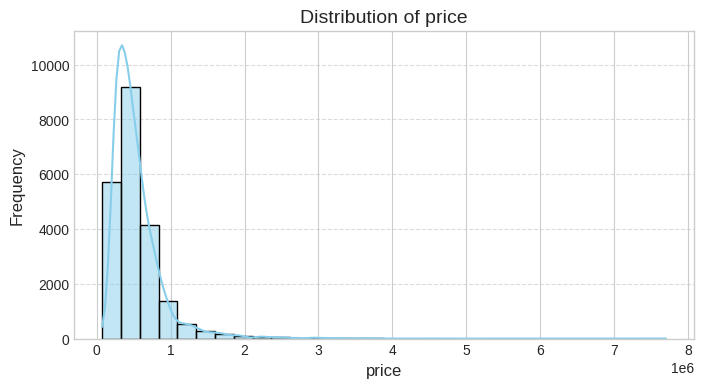

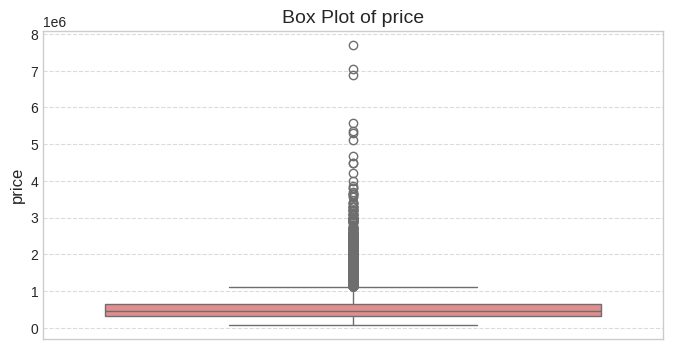

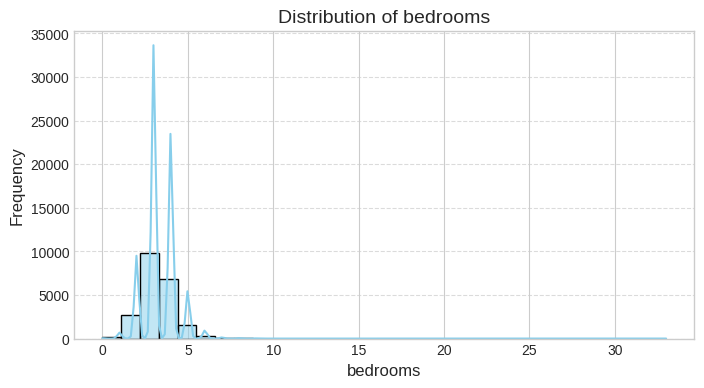

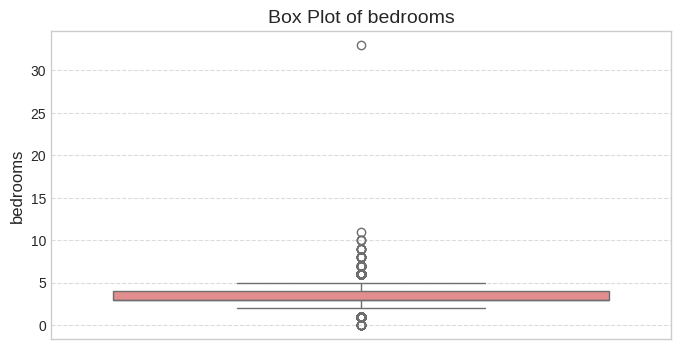

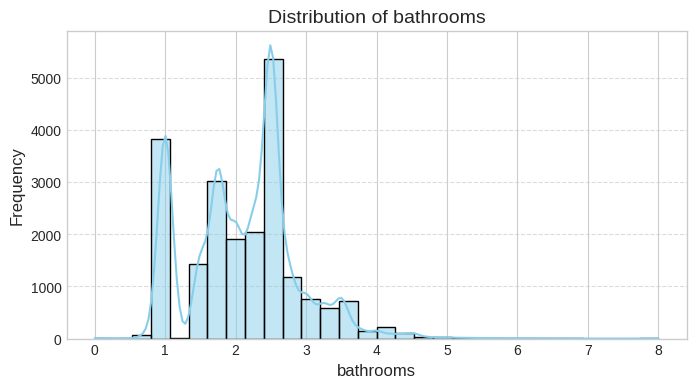

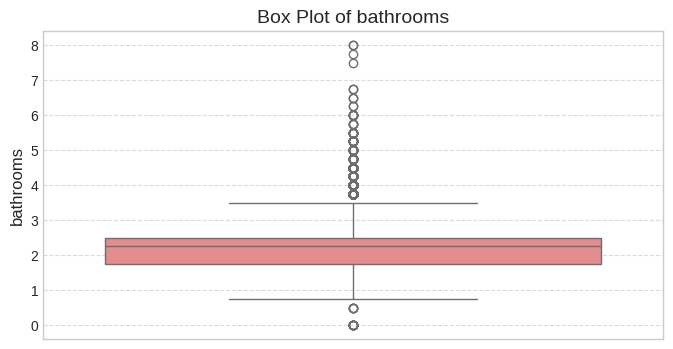

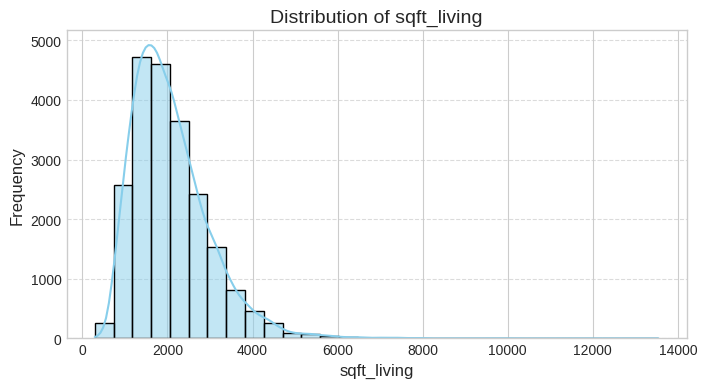

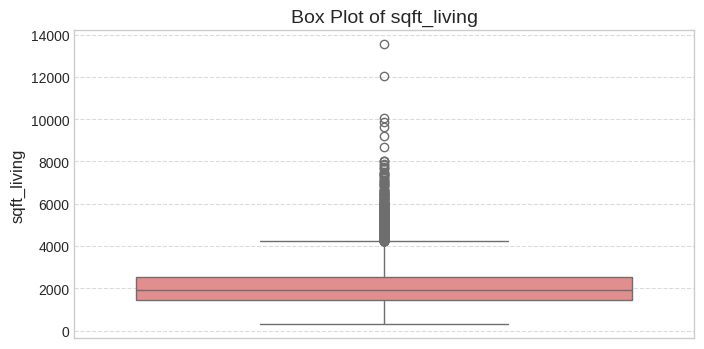

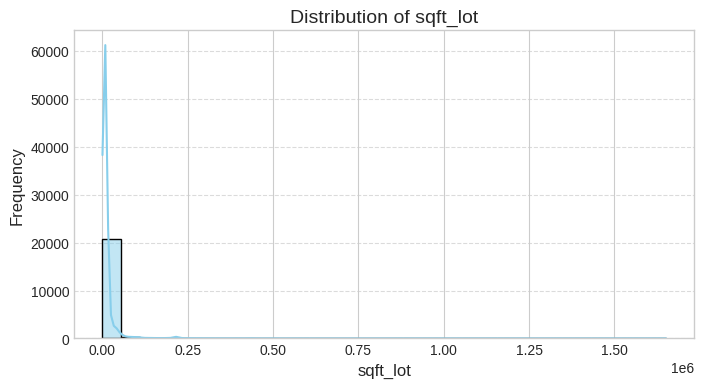

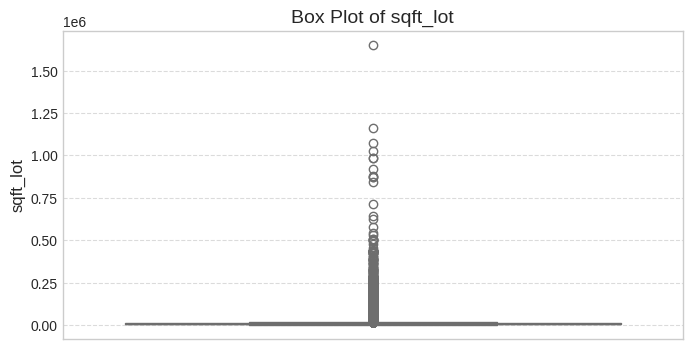

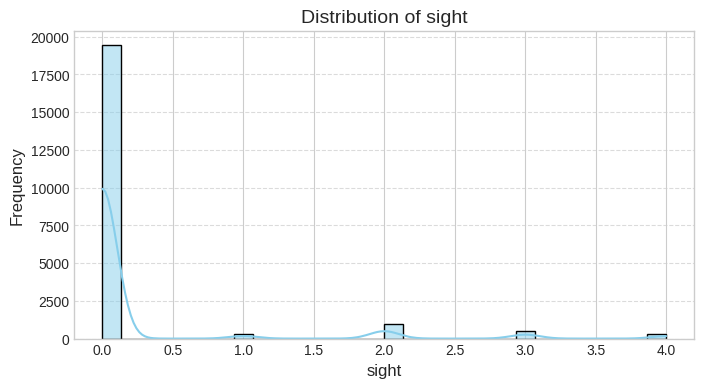

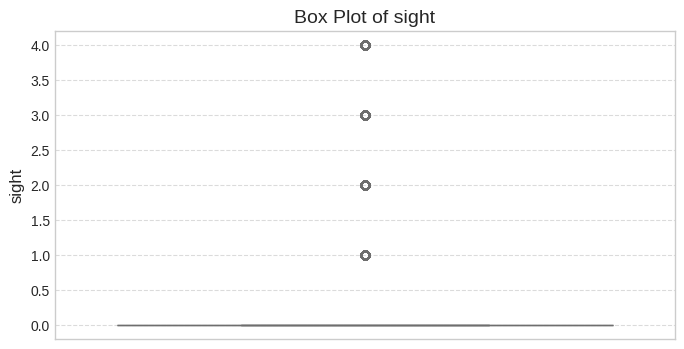

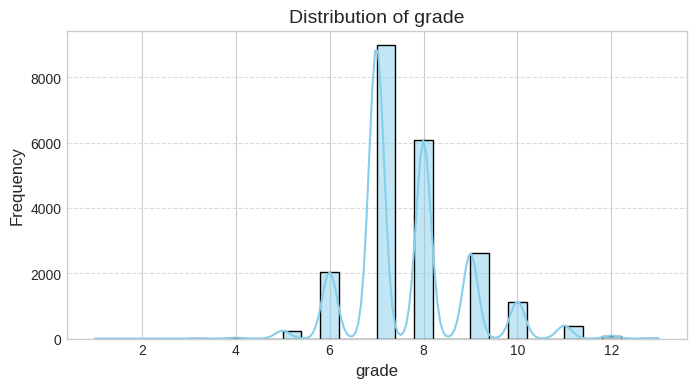

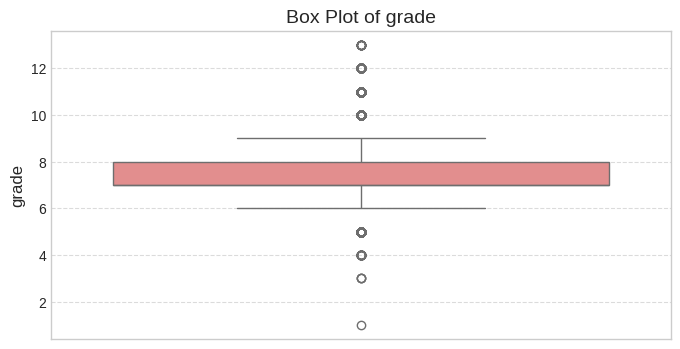

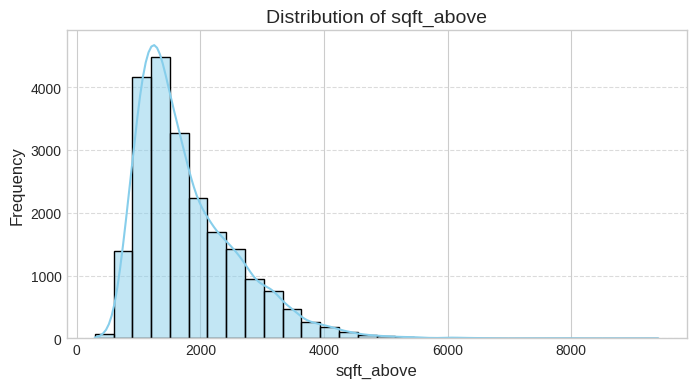

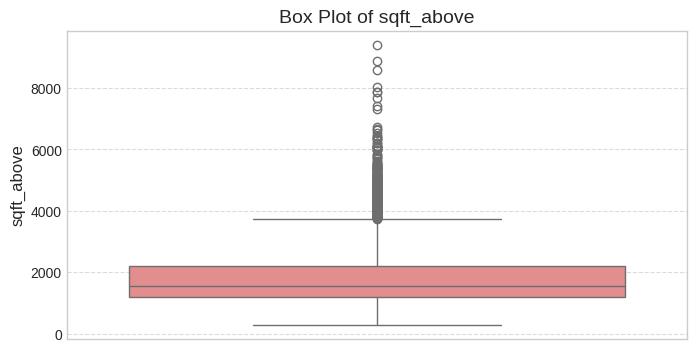

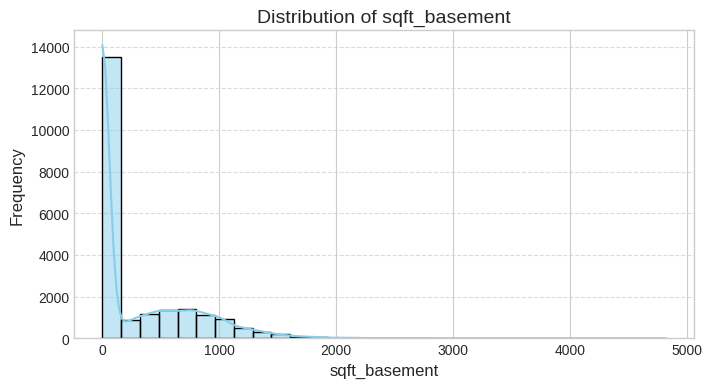

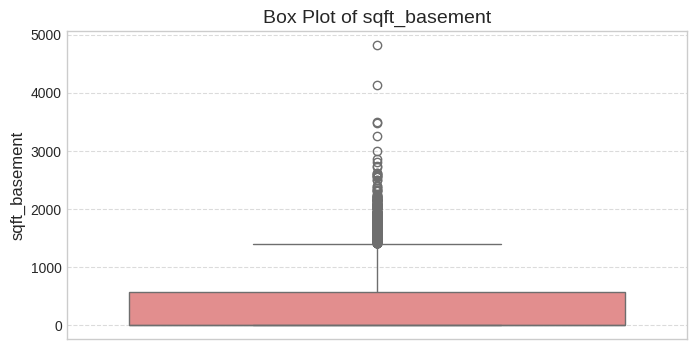

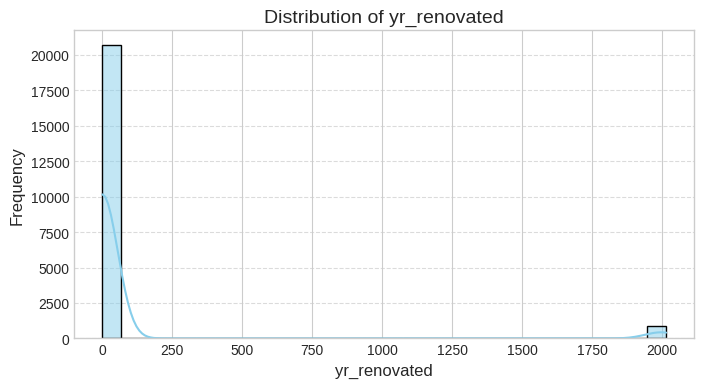

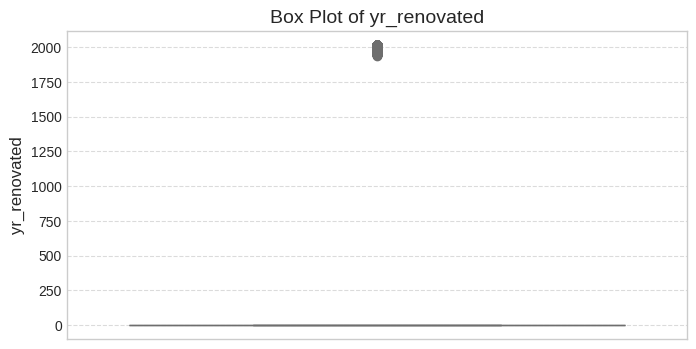

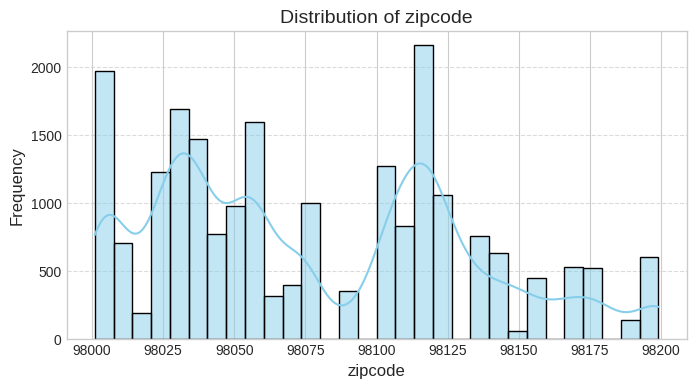

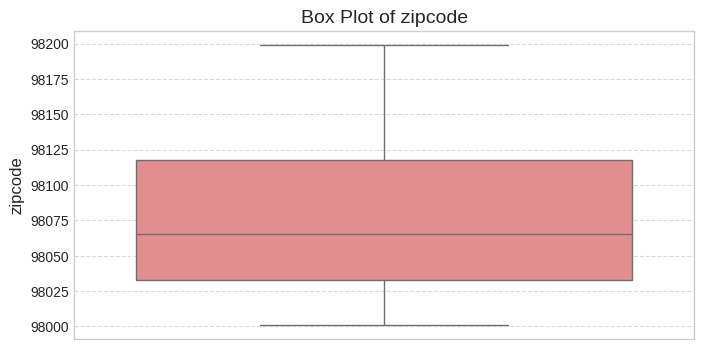

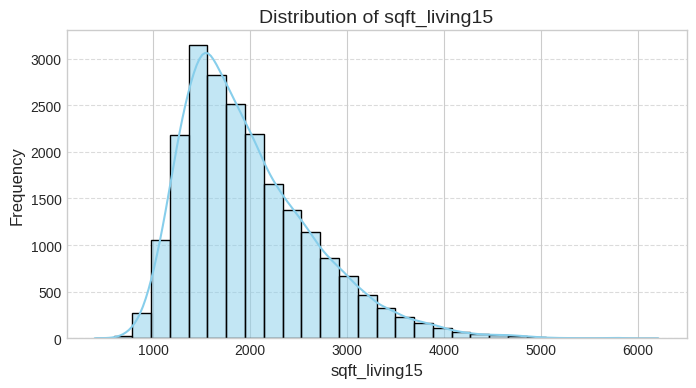

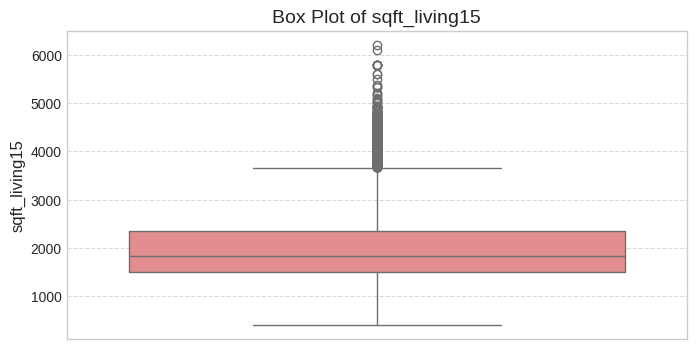

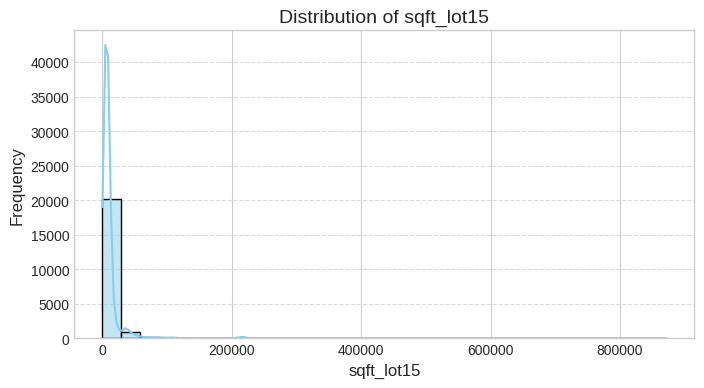

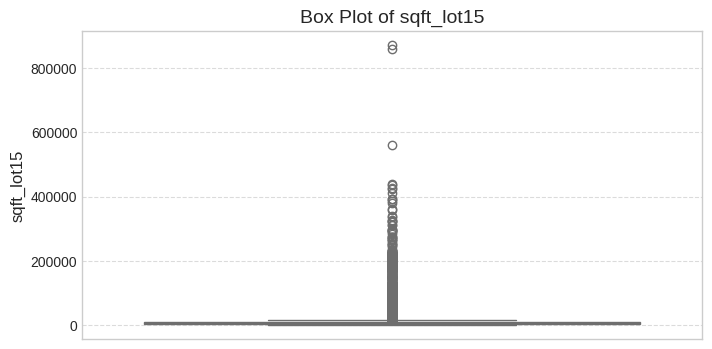

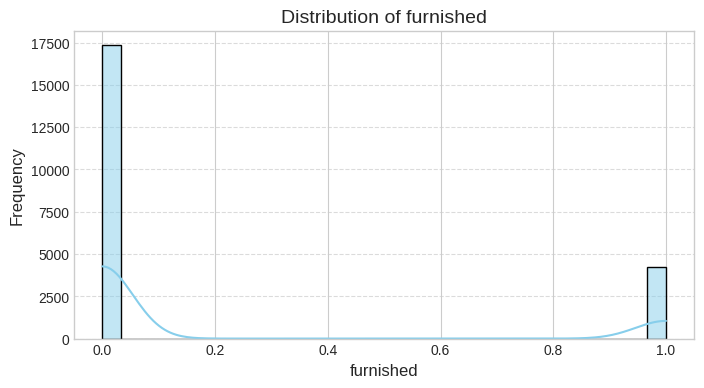

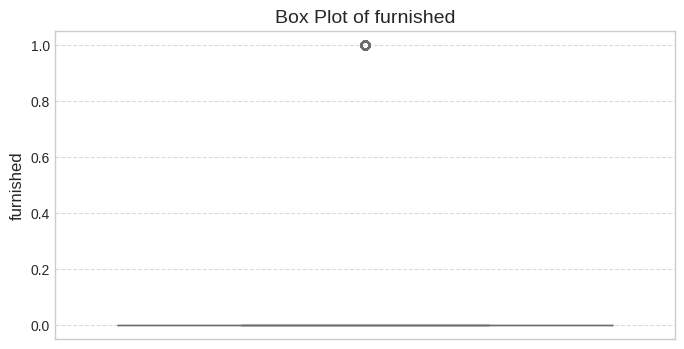

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['cid', 'lat', 'long', 'date']
numerical_cols_for_analysis = [col for col in numerical_cols if col not in cols_to_exclude]

# Set a modern style for plots
plt.style.use('seaborn-v0_8-whitegrid')

# Plotting distributions of numerical columns
for col in numerical_cols_for_analysis:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Optional: Box plot for visualizing central tendency and outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

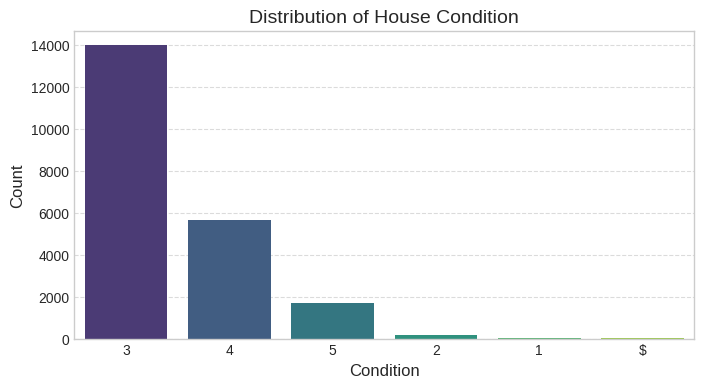

In [14]:
    # Plotting the distribution of the 'condition' column
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='condition', palette='viridis')
    plt.title('Distribution of House Condition', fontsize=14)
    plt.xlabel('Condition', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

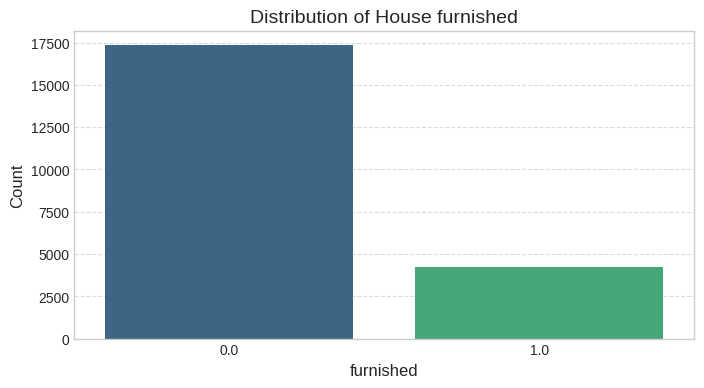

In [15]:
import matplotlib.pyplot as plt
if 'furnished' in df.columns:
    # Plotting the distribution of the 'condition' column (assuming it's categorical or ordinal)
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='furnished', palette='viridis')
    plt.title('Distribution of House furnished', fontsize=14)
    plt.xlabel('furnished', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Bivairate Analysis

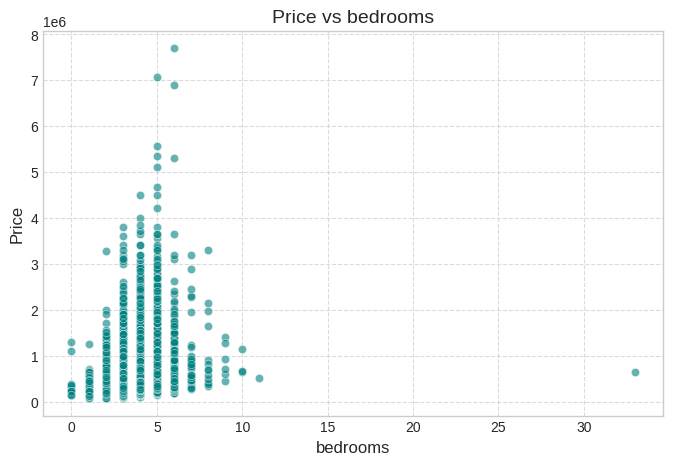

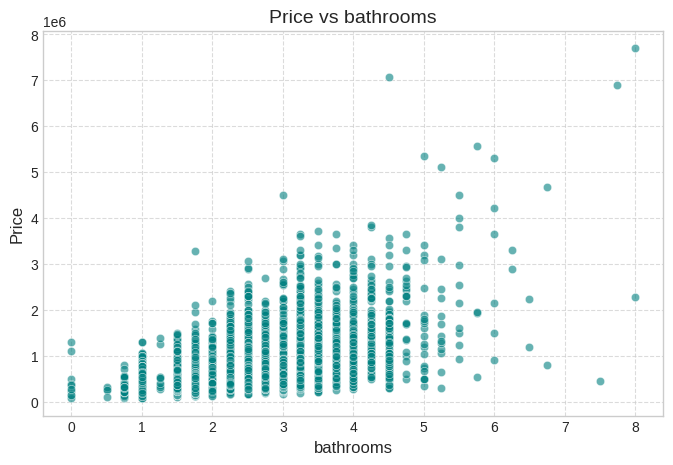

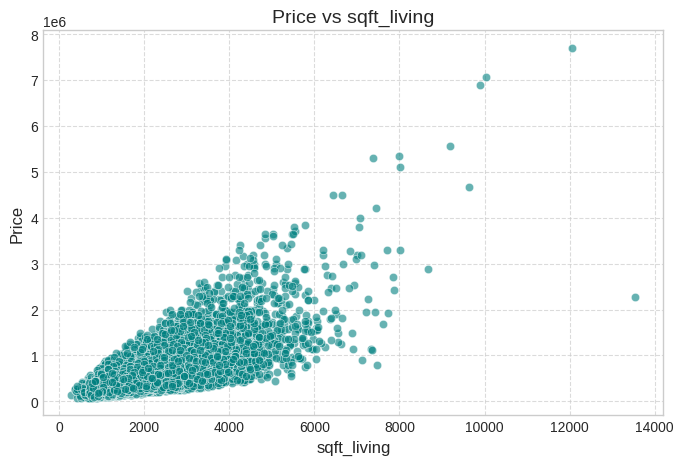

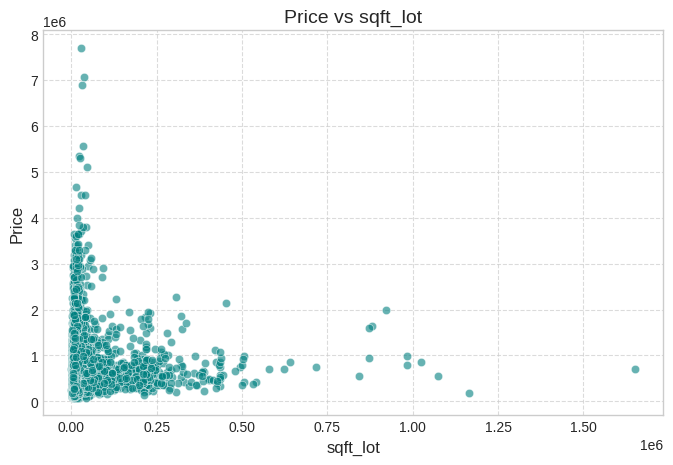

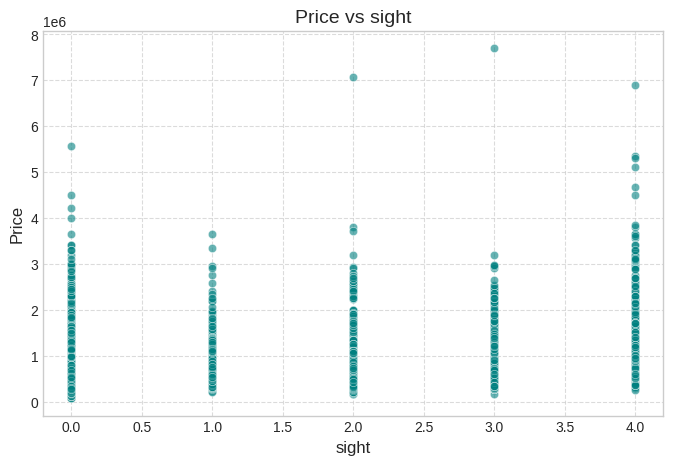

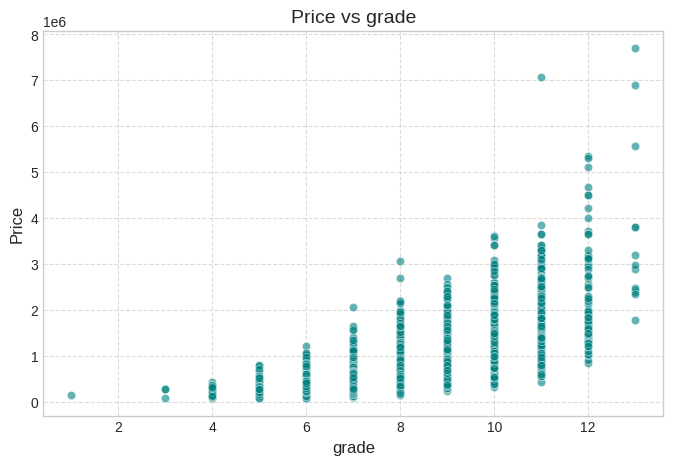

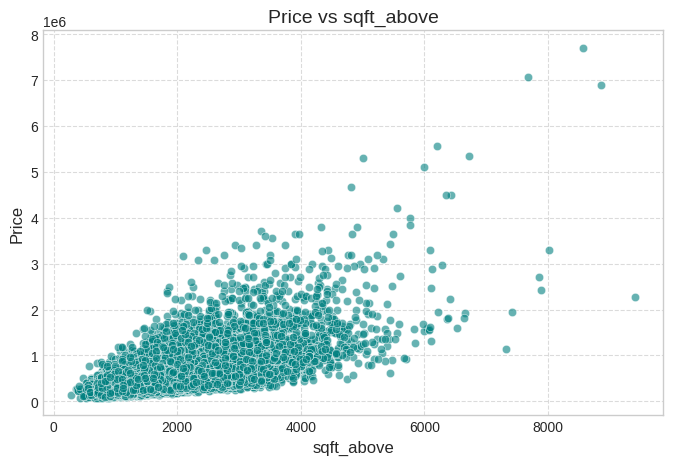

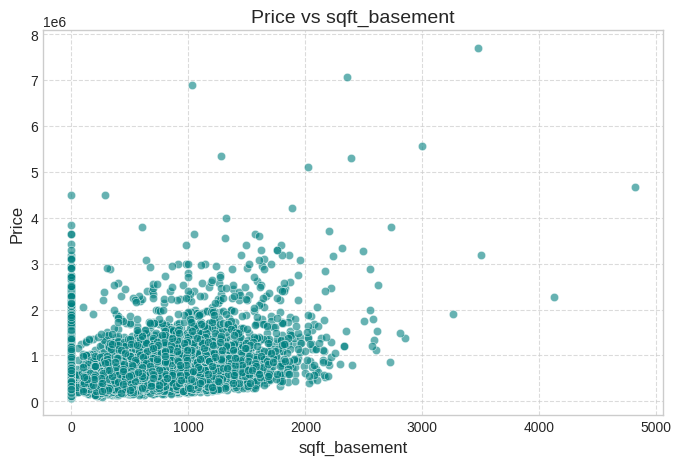

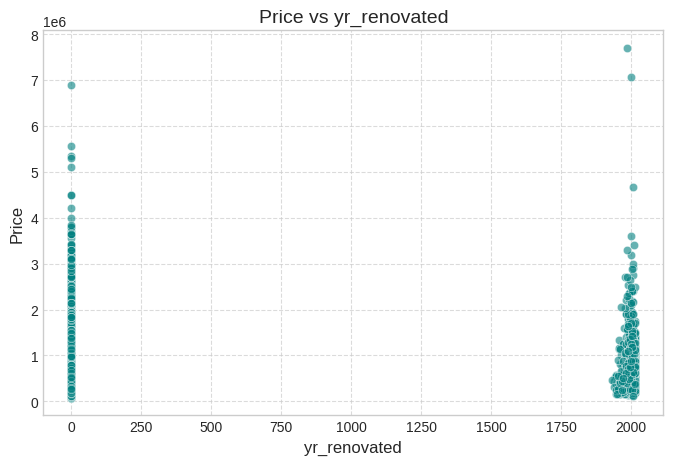

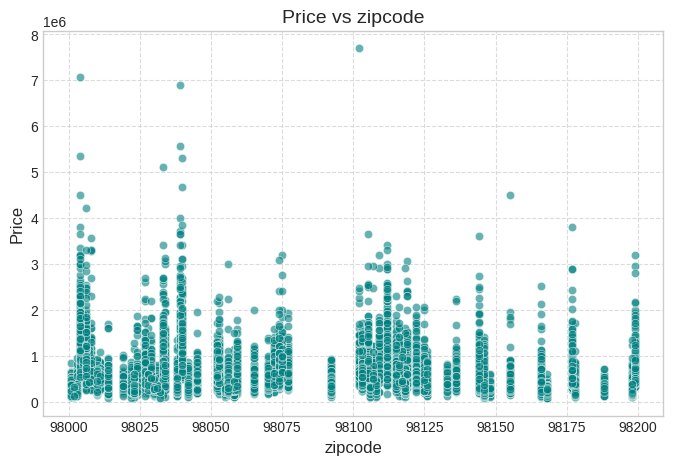

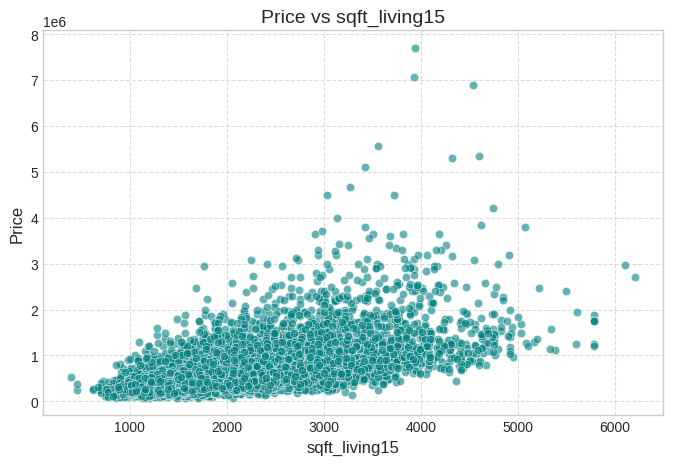

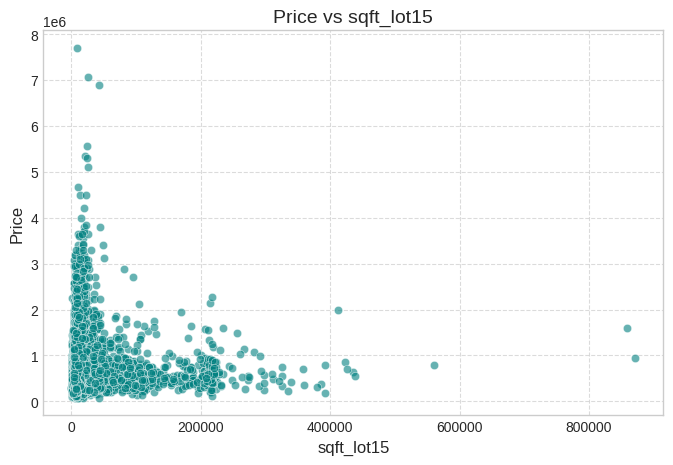

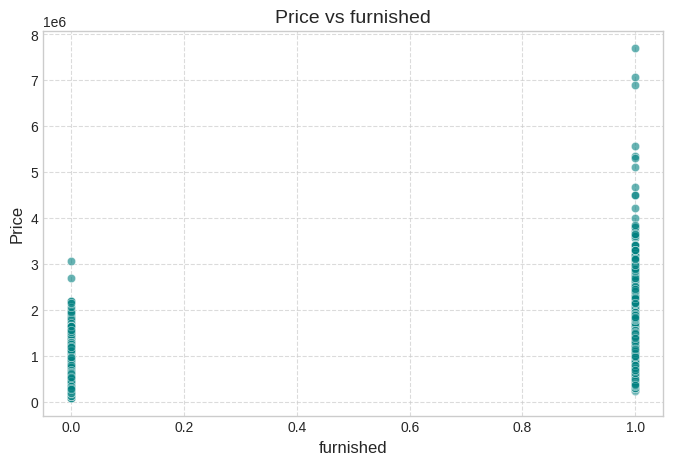

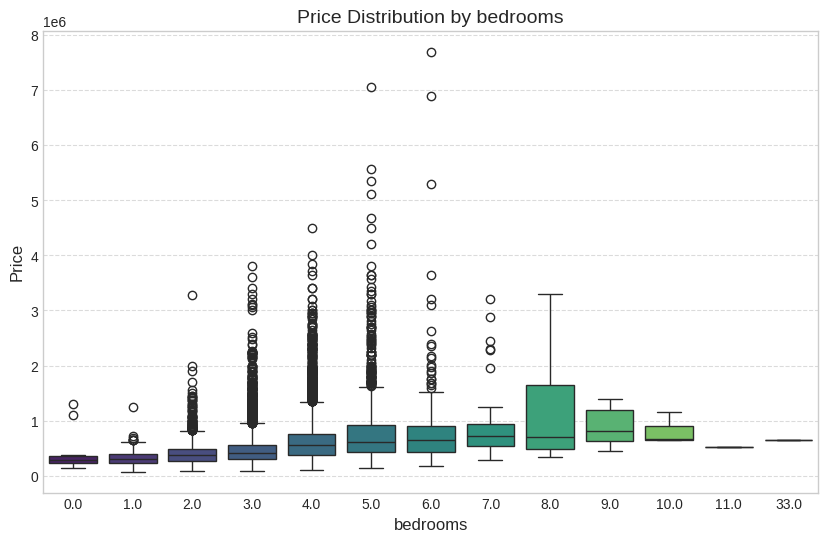

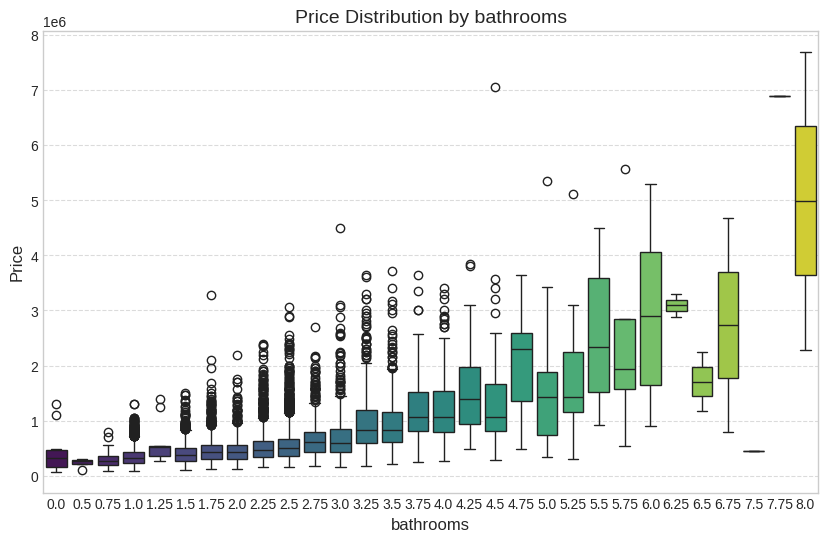

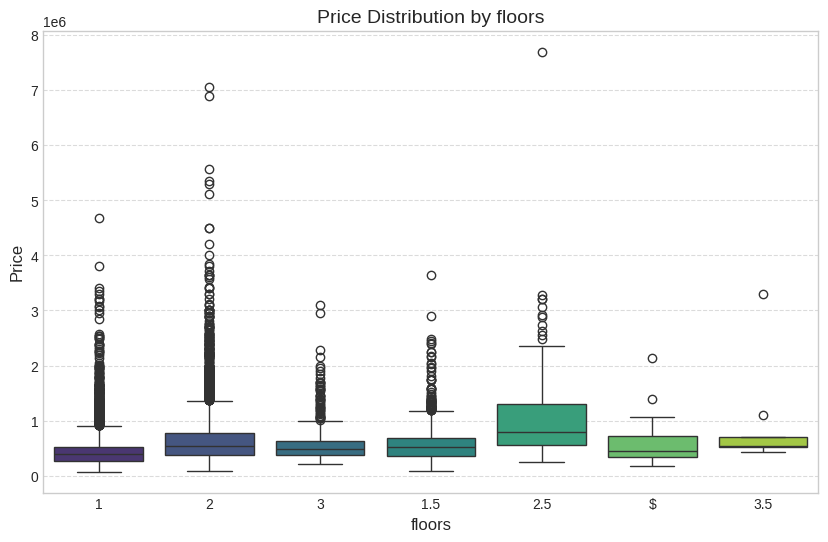

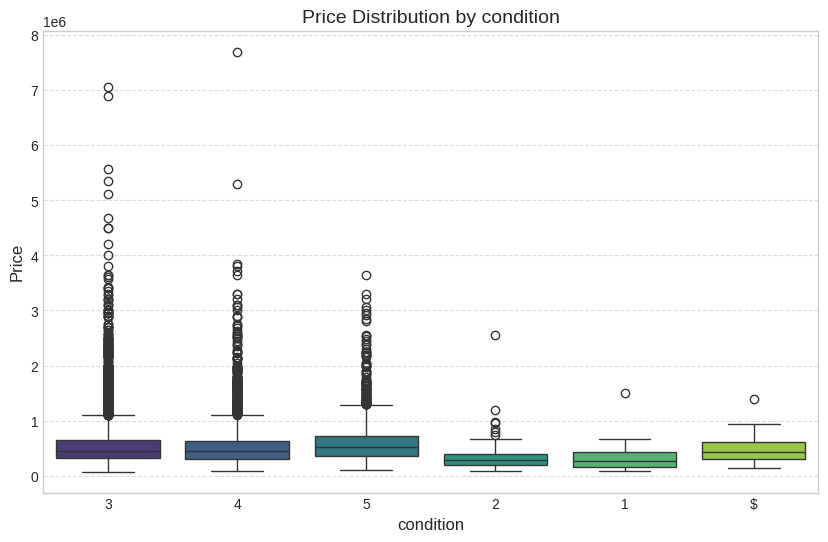

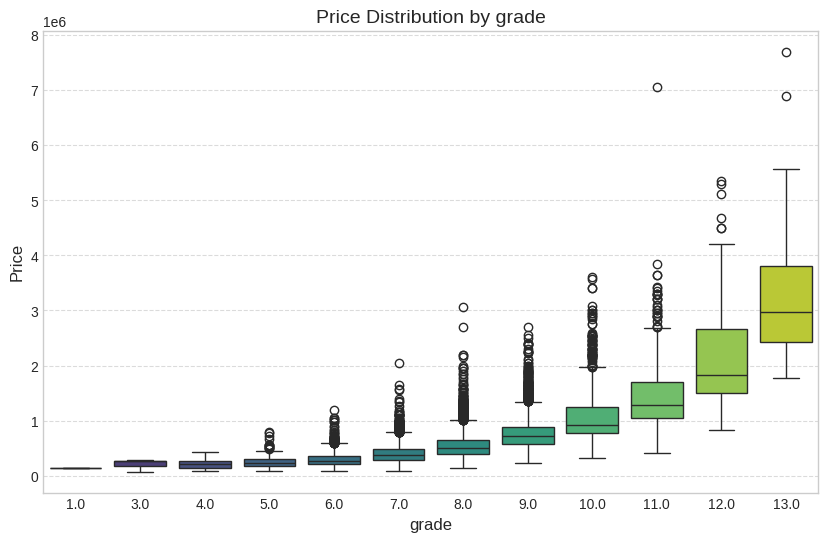

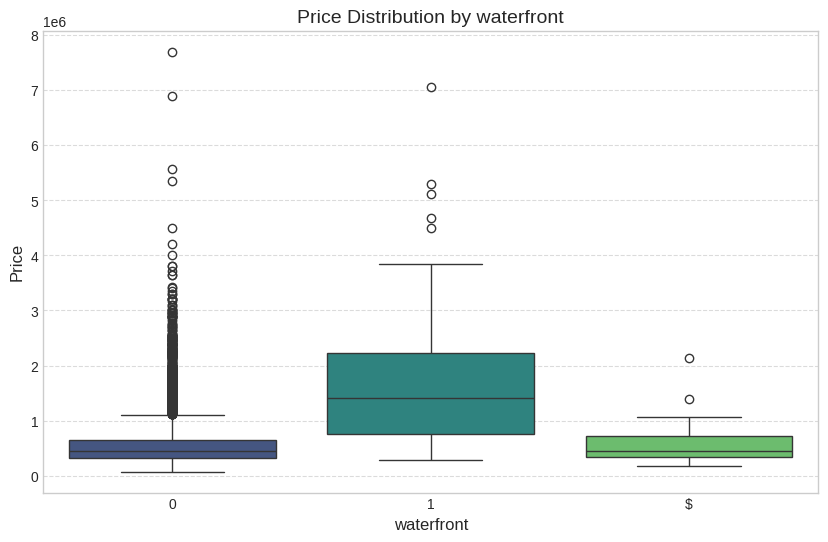

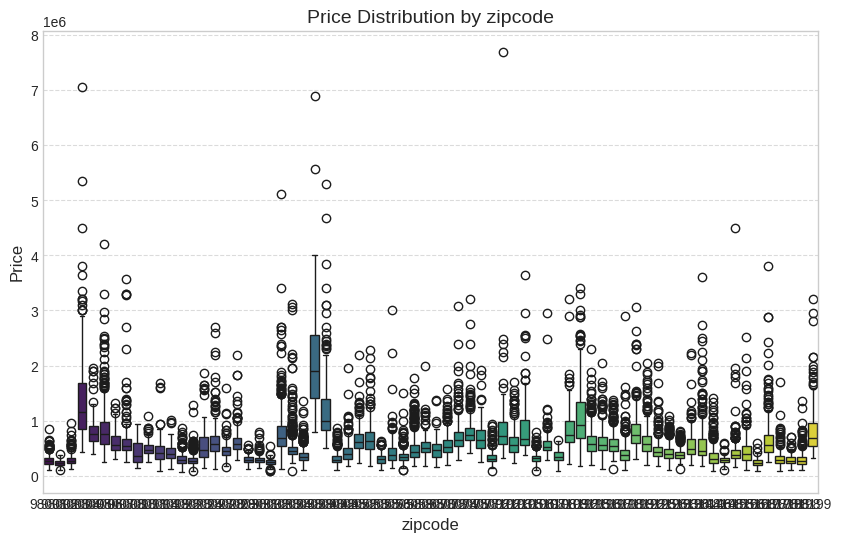

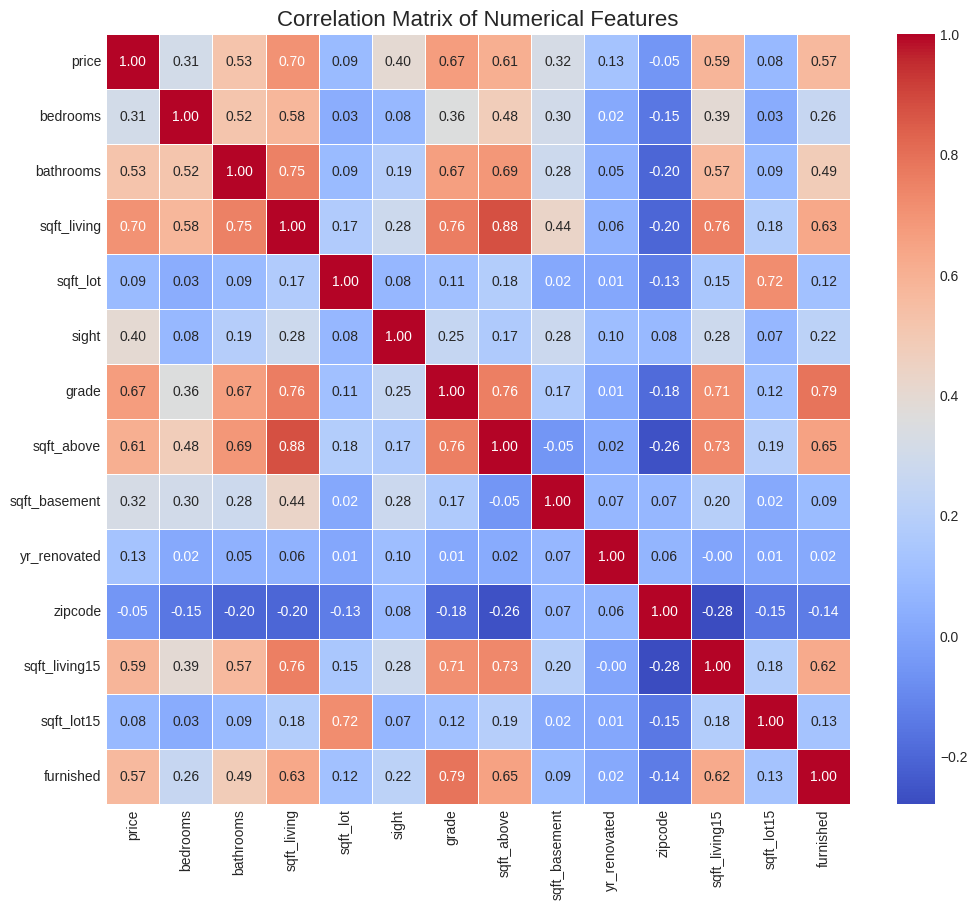

In [16]:
import matplotlib.pyplot as plt
# Relationship between numerical features and 'price'
for col in numerical_cols_for_analysis:
    if col != 'price': # Exclude price when analyzing against itself
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=col, y='price', alpha=0.6, color='teal')
        plt.title(f'Price vs {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.grid(axis='both', linestyle='--', alpha=0.7)
        plt.show()

# Relationship between categorical-like numerical features and 'price' using boxplots
categorical_like_numerical = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront', 'zipcode']

for col in categorical_like_numerical:
    if col in df.columns: # Check if the column exists after renaming
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y='price', palette='viridis')
        plt.title(f'Price Distribution by {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Correlation Heatmap
correlation_matrix = df[numerical_cols_for_analysis].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Multi Variate Analysis

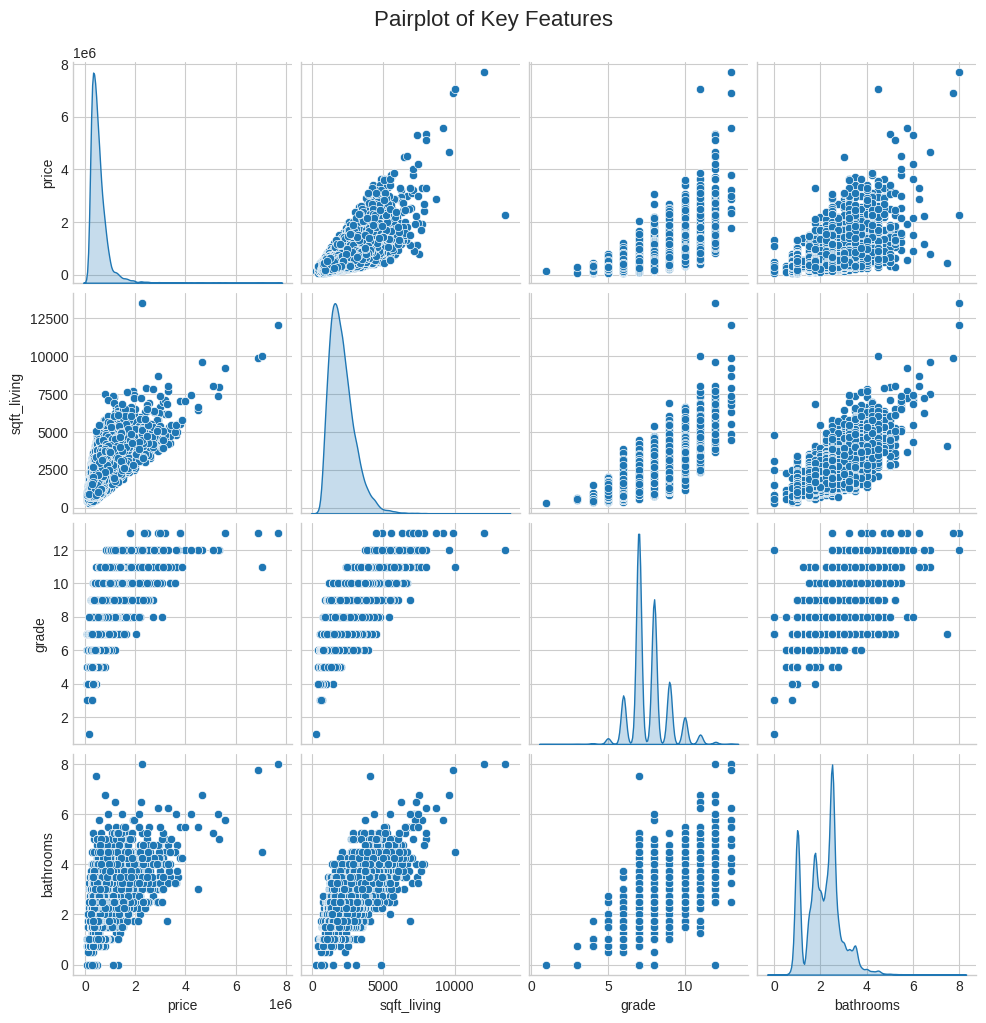

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px

# Drop rows with missing values in 'sqft_living' for the 3D scatter plot
df_cleaned = df.dropna(subset=['sqft_living'])

# 3D Scatter plot for 'price', 'sqft_living', and 'grade'
fig = px.scatter_3d(df_cleaned, x='sqft_living', y='grade', z='price',
                    color='price', size='sqft_living', opacity=0.8,
                    title='3D Scatter Plot of Price, Sqft_living, and Grade')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

# Pairplot for a subset of key features
features_for_pairplot = ['price', 'sqft_living', 'grade', 'bathrooms', 'waterfront']
sns.pairplot(df[features_for_pairplot], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16)
plt.show()

## Missing Value Treatment

In [18]:
df1=df.copy()

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21505 non-null  float64
 4   bathrooms      21505 non-null  float64
 5   sqft_living    21596 non-null  float64
 6   sqft_lot       21571 non-null  float64
 7   floors         21571 non-null  object 
 8   waterfront     21612 non-null  object 
 9   sight          21556 non-null  float64
 10  condition      21556 non-null  object 
 11  grade          21612 non-null  float64
 12  sqft_above     21612 non-null  float64
 13  sqft_basement  21612 non-null  float64
 14  yr_built       21612 non-null  object 
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
df1.head()

cid             date   price  bedrooms  bathrooms  sqft_living  \
0  3876100940  20150427T000000  600000      4.00       1.75      3050.00   
1  3145600250  20150317T000000  190000      2.00       1.00       670.00   
2  7129303070  20140820T000000  735000      4.00       2.75      3040.00   
3  7338220280  20141010T000000  257000      3.00       2.50      1740.00   
4  7950300670  20150218T000000  450000      2.00       1.00      1120.00   

   sqft_lot floors waterfront  sight  ... sqft_basement  yr_built  \
0   9440.00      1          0   0.00  ...       1250.00      1966   
1   3101.00      1          0   0.00  ...          0.00      1948   
2   2415.00      2          1   4.00  ...          0.00      1966   
3   3721.00      2          0   0.00  ...          0.00      2009   
4   4590.00      1          0   0.00  ...          0.00      1924   

   yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15 furnished  \
0             0    98034 47.72 -122.18        2020.00     8660.00      0.00   
1             0    98118 47.55 -122.27        1660.00     4100.00      0.00   
2             0    98118 47.52 -122.26        2620.00     2433.00      0.00   
3             0    98002 47.34 -122.21        2030.00     3794.00      0.00   
4             0    98118 47.57 -122.28        1120.00     5100.00      0.00   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

### **Step 1: Fix Incorrect Data Types**

In [22]:
# Count rows where 'bedrooms' is 0
zero_bedrooms_count = df1[df1['bedrooms'] == 0].shape[0]
print(f"Number of rows with 0 bedrooms: {zero_bedrooms_count}")

# Count rows where 'bathrooms' is 0
zero_bathrooms_count = df1[df1['bathrooms'] == 0].shape[0]
print(f"Number of rows with 0 bathrooms: {zero_bathrooms_count}")

Number of rows with 0 bedrooms: 13
Number of rows with 0 bathrooms: 10


It is impossible to have a house property with Zero bathrooms or bedrooms. I will drop these records since the number of records with 0 bathrooms and bedrooms are very few.

In [23]:
# Drop rows where 'bedrooms' is 0 or 'bathrooms' is 0
initial_rows = df1.shape[0]
df1 = df1[(df1['bedrooms'] != 0) & (df1['bathrooms'] != 0)]
rows_removed = initial_rows - df1.shape[0]

print(f"Removed {rows_removed} rows with 0 bedrooms or 0 bathrooms.")
print("DataFrame shape after removal:", df1.shape)
df1.info()

Removed 16 rows with 0 bedrooms or 0 bathrooms.
DataFrame shape after removal: (21597, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21555 non-null  object 
 8   waterfront     21596 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21540 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  object 
 15  yr_renovated   21597 non-null  int64  
 16  zipcode 

In [25]:
# Inspect unique values in 'floors' column
print("Unique values in 'floors' column before cleaning:")
print(df1['floors'].unique())

# Identify non-numeric values in 'floors'
non_numeric_floors = df1[pd.to_numeric(df1['floors'], errors='coerce').isna()]['floors'].unique()
print(f"\nNon-numeric values found in 'floors': {non_numeric_floors}")

# Convert 'floors' to numeric, coercing errors to NaN
df1['floors'] = pd.to_numeric(df1['floors'], errors='coerce')

# Calculate the median of the numeric 'floors' values
median_floors = df1['floors'].median()
print(f"Median of numeric 'floors' values: {median_floors}")

# Impute NaN values in 'floors' with the calculated median
df1['floors'].fillna(median_floors, inplace=True)

# Convert the 'floors' column to int64
df1['floors'] = df1['floors'].astype('int64')

df1.info()

Unique values in 'floors' column before cleaning:
[1 2 3]

Non-numeric values found in 'floors': []
Median of numeric 'floors' values: 1.0
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21596 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21540 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  object 
 15  yr_r

In [26]:
df1['waterfront'] = df1['waterfront'].map({1: 'yes', 0: 'no'})

In [27]:
import pandas as pd
# Check unique values in 'condition' column
print("Unique values in 'condition' column before cleaning:")
print(df1['condition'].unique())

# Identify non-numeric values (like '$') in 'condition'
# Convert 'condition' to string first to handle potential mixed types
df1['condition_str'] = df1['condition'].astype(str)
non_numeric_condition = df1[df1['condition_str'].str.contains(r'[$\D]', na=False)]['condition_str'].unique()
print(f"\nNon-numeric values found in 'condition': {non_numeric_condition}")

# Remove '$' and convert to numeric, coercing errors and NaNs
df1['condition'] = df1['condition_str'].astype(str).str.replace(r'[$\D]', '', regex=True)
df1['condition'] = pd.to_numeric(df1['condition'], errors='coerce')

# Calculate the median of the numeric 'condition' values
median_condition = df1['condition'].median()
print(f"Median of numeric 'condition' values: {median_condition}")

# Impute NaN values in 'condition' with the calculated median
df1['condition'].fillna(median_condition, inplace=True)

# Convert the 'condition' column to int64 (if appropriate, check value range)
# Assuming condition is likely an integer rating
df1['condition'] = df1['condition'].astype('int64')

# Drop the temporary string column
df1 = df1.drop(columns=['condition_str'])

df1.info()
print("Unique values in 'condition' column after cleaning:")
print(df1['condition'].unique())

Unique values in 'condition' column before cleaning:
[3 4 5 2 nan 1 '$']

Non-numeric values found in 'condition': ['nan' '$']
Median of numeric 'condition' values: 3.0
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       215

In [28]:
# Check the unique values and data type of the 'condition' column
print("Unique values in 'condition' column before mapping:")
print(df1['condition'].unique())
print("\nData type of 'condition' column before mapping:")
print(df1['condition'].dtype)

# Define the mapping dictionary
condition_map = {
    1: 'Poor',
    2: 'Fair',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}

# Map the 'condition' column using the dictionary
df1['condition'] = df1['condition'].map(condition_map)

# Verify the mapping and the new data type
print("\nUnique values in 'condition' column after mapping:")
print(df1['condition'].unique())
print("\nData type of 'condition' column after mapping:")
print(df1['condition'].dtype)

Unique values in 'condition' column before mapping:
[3 4 5 2 1]

Data type of 'condition' column before mapping:
int64

Unique values in 'condition' column after mapping:
['Average' 'Good' 'Excellent' 'Fair' 'Poor']

Data type of 'condition' column after mapping:
object


**Step 2: Imputing the missing values and non numeric values with median**

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  object 
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long       

In [30]:
print(df1['yr_built'].unique())

[1966 1948 2009 1924 1994 2005 1978 1983 2012 1912 1990 1967 1919 1908
 1950 2000 2013 1943 1922 1977 2004 1935 1964 1945 1987 2008 1940 2003
 1988 1985 1998 1995 1946 1984 1958 1963 1942 2014 1971 1936 1954 1923
 2002 1972 2007 1930 1962 1999 1953 1965 2010 1997 2006 1979 1996 1992
 1968 1980 1981 1969 2001 1929 1952 1916 1976 1974 1920 1931 1975 1960
 1900 '$' 1986 1989 1906 1955 1956 1915 1941 1993 2011 1925 1947 1991 1926
 1927 1951 1961 1932 1917 1928 1959 1921 1911 1949 1982 1913 1957 1914
 1938 1973 1937 1944 1970 1901 1907 1939 1918 1934 1904 2015 1909 1910
 1905 1902 1933 1903 nan]


There are non numeric values in the yr_build column

In [31]:
df1['yr_built_str'] = df1['yr_built'].astype(str)
non_numeric_yr_built = df1[df1['yr_built_str'].str.contains(r'[$\D]', na=False)]['yr_built_str'].unique()
print(f"\nNon-numeric values found in 'yr_built': {non_numeric_yr_built}")

# Remove '$' and convert to numeric, coercing errors and NaNs
df1['yr_built'] = df1['yr_built_str'].astype(str).str.replace(r'[$\D]', '', regex=True)
df1['yr_built'] = pd.to_numeric(df1['yr_built'], errors='coerce')

# Calculate the median of the numeric 'yr_built' values
median_yr_built = df1['yr_built'].median()
print(f"Median of numeric 'yr_built' values: {median_yr_built}")

# Impute NaN values in 'yr_built' with the calculated median
df1['yr_built'].fillna(median_yr_built, inplace=True)

# Convert the 'yr_built' column to int64 (as years are typically integers)
df1['yr_built'] = df1['yr_built'].astype('int64')

# Drop the temporary string column
df1 = df1.drop(columns=['yr_built_str'])

df1.info()
print("Unique values in 'yr_built' column after cleaning:")
print(df1['yr_built'].unique())
print("\nData type of 'yr_built' column after cleaning:")
print(df1['yr_built'].dtype)


Non-numeric values found in 'yr_built': ['$' 'nan']
Median of numeric 'yr_built' values: 1975.0
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zi

In [32]:
# Inspect unique values in 'long' column
print("Unique values in 'long' column before cleaning:")
print(df1['long'].unique())

# Identify non-numeric values (like '$') in 'long'
# Convert 'long' to string first to handle potential mixed types
df1['long_str'] = df1['long'].astype(str)
non_numeric_long = df1[df1['long_str'].str.contains(r'[$\D]', na=False)]['long_str'].unique()
print(f"\nNon-numeric values found in 'long': {non_numeric_long}")

# Remove '$' and convert to numeric, coercing errors and NaNs
df1['long'] = df1['long_str'].astype(str).str.replace(r'[$\D]', '', regex=True)
df1['long'] = pd.to_numeric(df1['long'], errors='coerce')

# Calculate the median of the numeric 'long' values
median_long = df1['long'].median()
print(f"Median of numeric 'long' values: {median_long}")

# Impute NaN values in 'long' with the calculated median
df1['long'].fillna(median_long, inplace=True)

# Convert the 'long' column to float64
df1['long'] = df1['long'].astype('float64')

# Drop the temporary string column
df1 = df1.drop(columns=['long_str'])

df1.info()
print(df1['long'].dtype)

Unique values in 'long' column before cleaning:
[-122.183 -122.274 -122.256 -122.213 -122.285 '$' -122.333 -122.165
 -122.15 -122.178 -121.87 -122.352 -122.122 -122.275 -122.234 -122.324
 -122.321 -122.277 -122.196 -122.398 -122.019 -122.181 -122.325 -122.191
 -122.026 -122.084 -122.3 -122.287 -122.011 -122.127 -122.281 -122.221
 -121.859 -121.913 -122.39 -121.871 -122.013 -122.381 -122.279 -122.194
 -122.201 -122.125 -122.379 -122.121 -122.024 -122.389 -122.305 -122.346
 -122.375 -122.344 -122.028 -122.193 -122.209 -122.365 -122.28 -122.334
 -122.149 -122.388 -122.016 -122.298 -122.153 -121.802 -121.878 -122.218
 -122.359 -122.296 -122.361 -122.357 -122.309 -122.056 -121.974 -122.18
 -122.331 -122.374 -121.976 -121.975 -122.216 -122.188 -122.391 -122.31
 -122.302 -121.972 -122.22 -122.17 -122.101 -121.888 -122.046 -122.154
 -122.145 -122.236 -122.168 -122.469 -122.248 -122.412 -122.356 -121.908
 -122.048 -122.147 -122.017 -121.955 -122.169 -122.392 -122.081 -122.37
 -122.21 -122.049 -

In [33]:
df1['total_area_numeric'] = pd.to_numeric(df1['total_area'], errors='coerce')
median_total_area = df1['total_area_numeric'].median()
print(f"\nMedian of numeric 'total_area' values: {median_total_area}")

# Impute NaN values in the original 'total_area' column with the calculated median
# Use the numeric column to find NaNs, but impute in the original column
df1['total_area'].fillna(median_total_area, inplace=True)

# Now convert the 'total_area' column to float64
# It's possible after filling NaNs with median, there are still some string values if fillna didn't work
# So, we first ensure it's numeric again before converting to float64
df1['total_area'] = pd.to_numeric(df1['total_area'], errors='coerce')

# Fill any remaining NaNs introduced by the final numeric conversion (if any non-numeric values couldn't be handled)
# This might be needed if the original column had values like '#' that didn't convert correctly
df1['total_area'].fillna(median_total_area, inplace=True) # Re-impute if needed

# Finally, convert to float64
df1['total_area'] = df1['total_area'].astype('float64')

# Drop the temporary numeric column
df1 = df1.drop(columns=['total_area_numeric'])

df1.info()
print("\nData type of 'total_area' column after cleaning and conversion:")
print(df1['total_area'].dtype)


Median of numeric 'total_area' values: 9575.0
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21489 non-null  float64
 4   bathrooms      21489 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21555 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21540 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat     

In [34]:
# impute missing balues in bedrooms, bathrooms, sqft_lot, sqft_lot15, sight, grade, sqft_above, sqft_basement, sqft_living15, furnished with median

# Columns to impute with median
cols_to_impute_median = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_lot15', 'sight', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'furnished']

for col in cols_to_impute_median:
    if col in df1.columns:
        # Calculate median only on non-missing values
        median_val = df1[col].median()
        df1[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_val}")
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Verify that missing values have been imputed
print("\nMissing values after imputation:")
print(df1[cols_to_impute_median].isnull().sum())

Imputed missing values in 'bedrooms' with median: 3.0
Imputed missing values in 'bathrooms' with median: 2.25
Imputed missing values in 'sqft_lot' with median: 7618.0
Imputed missing values in 'sqft_lot15' with median: 7620.0
Imputed missing values in 'sight' with median: 0.0
Imputed missing values in 'grade' with median: 7.0
Imputed missing values in 'sqft_above' with median: 1560.0
Imputed missing values in 'sqft_basement' with median: 0.0
Imputed missing values in 'sqft_living15' with median: 1840.0
Imputed missing values in 'furnished' with median: 0.0

Missing values after imputation:
bedrooms         0
bathrooms        0
sqft_lot         0
sqft_lot15       0
sight            0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
furnished        0
dtype: int64


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21580 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21597 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long       

In [36]:
if 'sqft_living' in df1.columns:
    median_sqft_living = df1['sqft_living'].median()
    df1['sqft_living'].fillna(median_sqft_living, inplace=True)
    print(f"Imputed missing values in 'sqft_living' with median: {median_sqft_living}")
else:
    print("Column 'sqft_living' not found in DataFrame.")

# Verify that missing values have been imputed in sqft_living
print("\nMissing values after imputation:")
print(df1[['sqft_living']].isnull().sum())

df1.info()

Imputed missing values in 'sqft_living' with median: 1910.0

Missing values after imputation:
sqft_living    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21566 non-null  object 
 9   sight          21597 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   2159

In [37]:
if 'waterfront' in df1.columns:
    mode_waterfront = df1['waterfront'].mode()[0] # .mode() returns a Series, take the first element
    df1['waterfront'].fillna(mode_waterfront, inplace=True)
    print(f"Imputed missing values in 'waterfront' with mode: {mode_waterfront}")
else:
    print("Column 'waterfront' not found in DataFrame.")

# Verify that missing values have been imputed in waterfront
print("\nMissing values after imputation:")
print(df1[['waterfront']].isnull().sum())

df1.info()

Imputed missing values in 'waterfront' with mode: no

Missing values after imputation:
waterfront    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  int64  
 8   waterfront     21597 non-null  object 
 9   sight          21597 non-null  float64
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-nu

MISSING VALUE TREATMENT COMPLETED

## Outlier Treatment

The IQR method is the most suitable for my dataset because it's robust and not affected by the skewed nature of the data.

Since key variables like price, the IQR method accurately identifies true outliers without being misled by this skew. It provides a reliable statistical rule that perfectly complements the visual outlier detection we see in box plots.

We will apply our detection method to the most important numerical predictors:

* price

* bedrooms

* bathrooms

* sqft_living

* sqft_lot

In [38]:
# Select the relevant columns for outlier detection using IQR
columns_for_outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Create an empty dictionary to store the IQR fences
outlier_fences = {}

# Calculate IQR fences for each selected column
for col in columns_for_outliers:
    if col in df1.columns: # Ensure column exists
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_fences[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
        print(f"IQR Fences for '{col}':")
        print(f"  Q1: {Q1:.2f}")
        print(f"  Q3: {Q3:.2f}")
        print(f"  IQR: {IQR:.2f}")
        print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
        print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}\n")
    else:
        print(f"Column '{col}' not found in DataFrame.")

IQR Fences for 'price':
  Q1: 322000.00
  Q3: 645000.00
  IQR: 323000.00
  Lower Bound (Q1 - 1.5*IQR): -162500.00
  Upper Bound (Q3 + 1.5*IQR): 1129500.00

IQR Fences for 'bedrooms':
  Q1: 3.00
  Q3: 4.00
  IQR: 1.00
  Lower Bound (Q1 - 1.5*IQR): 1.50
  Upper Bound (Q3 + 1.5*IQR): 5.50

IQR Fences for 'bathrooms':
  Q1: 1.75
  Q3: 2.50
  IQR: 0.75
  Lower Bound (Q1 - 1.5*IQR): 0.62
  Upper Bound (Q3 + 1.5*IQR): 3.62

IQR Fences for 'sqft_living':
  Q1: 1430.00
  Q3: 2550.00
  IQR: 1120.00
  Lower Bound (Q1 - 1.5*IQR): -250.00
  Upper Bound (Q3 + 1.5*IQR): 4230.00

IQR Fences for 'sqft_lot':
  Q1: 5043.00
  Q3: 10660.00
  IQR: 5617.00
  Lower Bound (Q1 - 1.5*IQR): -3382.50
  Upper Bound (Q3 + 1.5*IQR): 19085.50



In [39]:
# Identify outliers based on the calculated fences
outliers = {}
for col, fences in outlier_fences.items():
    if col in df1.columns:
        # Boolean mask for outliers in the current column
        is_outlier = (df1[col] < fences['lower_bound']) | (df1[col] > fences['upper_bound'])

        # Filter the DataFrame to show only the rows identified as outliers for this column
        outliers_df = df1[is_outlier]

        outliers[col] = outliers_df
        print(f"Identified {len(outliers_df)} outliers in column '{col}':")
        if not outliers_df.empty:
            print(outliers_df[[col]]) # Print the outlier values for inspection
            print("-" * 20)
        else:
            print("No outliers found.")
            print("-" * 20)
    else:
        print(f"Column '{col}' not found in DataFrame for outlier identification.")

# You can now access the outlier DataFrames for each column, e.g.:
# print("Outliers in 'price':")
# print(outliers['price'])
# print("\nOutliers in 'bedrooms':")
# print(outliers['bedrooms'])
# etc.

# Optional: Create a new DataFrame excluding all identified outliers
# This method removes a row if it's an outlier in *any* of the selected columns
df_no_outliers = df1.copy()
for col, fences in outlier_fences.items():
     if col in df_no_outliers.columns:
        lower_bound = fences['lower_bound']
        upper_bound = fences['upper_bound']
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print(f"\nOriginal DataFrame shape: {df1.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")
print(f"Number of rows removed: {df1.shape[0] - df_no_outliers.shape[0]}")

Identified 1158 outliers in column 'price':
         price
7      1160000
88     1380000
100    1400000
134    1230000
145    1330000
...        ...
21547  1490000
21559  1390000
21570  1840000
21577  3100000
21612  1150000

[1158 rows x 1 columns]
--------------------
Identified 526 outliers in column 'bedrooms':
       bedrooms
25         1.00
124        6.00
155        6.00
184        6.00
225        1.00
...         ...
21389      1.00
21460      6.00
21466      1.00
21496      6.00
21580      1.00

[526 rows x 1 columns]
--------------------
Identified 559 outliers in column 'bathrooms':
       bathrooms
88          4.00
125         3.75
155         4.00
178         4.00
184         5.00
...          ...
21476       4.25
21496       4.00
21583       3.75
21604       4.00
21610       3.75

[559 rows x 1 columns]
--------------------
Identified 571 outliers in column 'sqft_living':
       sqft_living
7          4680.00
155        5110.00
173        4270.00
178        7320.00
184    

We will only delete the obvious error (the row with 33 bedrooms). We will leave the other "outliers" (like 1 or 6 bedrooms) alone because they are real data.

In [40]:
df1 = df1[df1['bedrooms'] != 33]
print("DataFrame shape after removing the outlier with 33 bedrooms:", df1.shape)
df1.info()

DataFrame shape after removing the outlier with 33 bedrooms: (21596, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cid            21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  int64  
 3   bedrooms       21596 non-null  float64
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  float64
 6   sqft_lot       21596 non-null  float64
 7   floors         21596 non-null  int64  
 8   waterfront     21596 non-null  object 
 9   sight          21596 non-null  float64
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  float64
 12  sqft_above     21596 non-null  float64
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   21596 non-null  int64  
 16  zipcode        21596 non-n

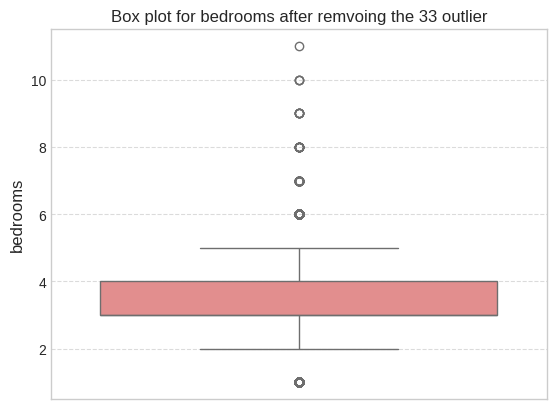

In [41]:
sns.boxplot(data=df1, y='bedrooms', color='lightcoral')
plt.title('Box plot for bedrooms after remvoing the 33 outlier')
plt.ylabel('bedrooms', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Box plot for bedrooms is looking much better after removing the 33 outlier

**Using Log Transformation for Outlier Treatment** ✅

Applying log transformation to 'sqft_living'.
Created new column 'sqft_living_log'.
Applying log transformation to 'sqft_lot'.
Created new column 'sqft_lot_log'.
Applying log transformation to 'sqft_above'.
Created new column 'sqft_above_log'.
Column 'sqft_basement' contains zero or negative values. Applying log1p transformation.
Created new column 'sqft_basement_log'.
Applying log transformation to 'sqft_living15'.
Created new column 'sqft_living15_log'.
Applying log transformation to 'sqft_lot15'.
Created new column 'sqft_lot15_log'.
Applying log transformation to 'total_area'.
Created new column 'total_area_log'.

DataFrame info after log transformations:
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cid                21596 non-null  int64  
 1   date               21596 non-null  object 
 2   price              21596 non-nul

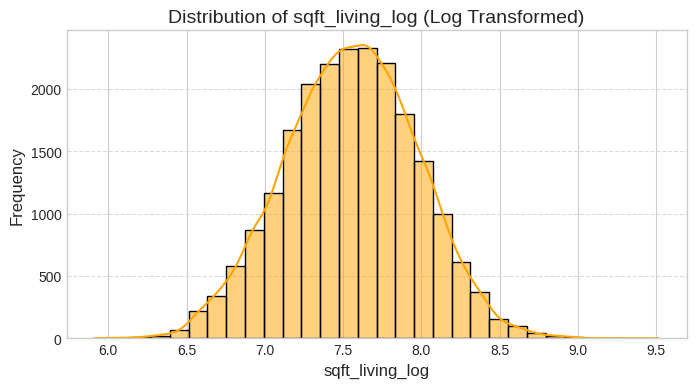

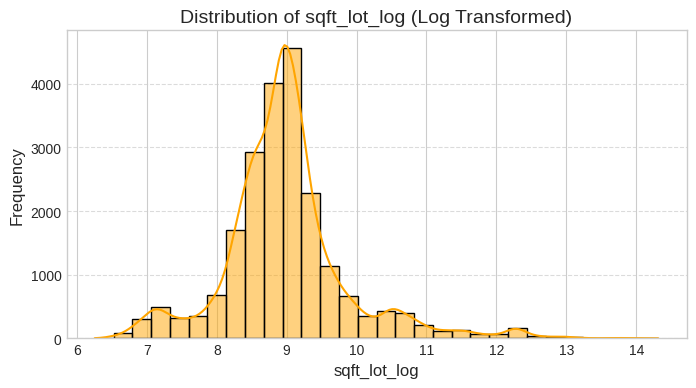

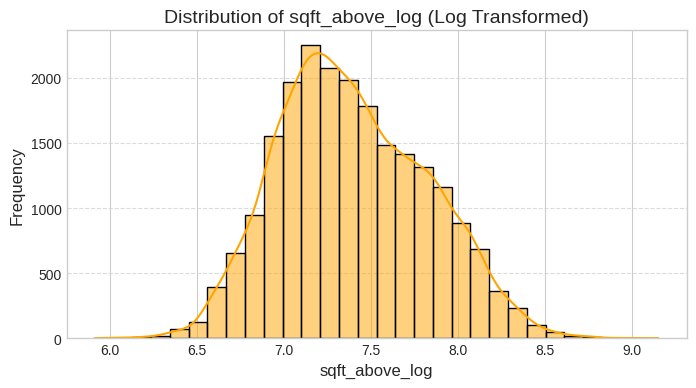

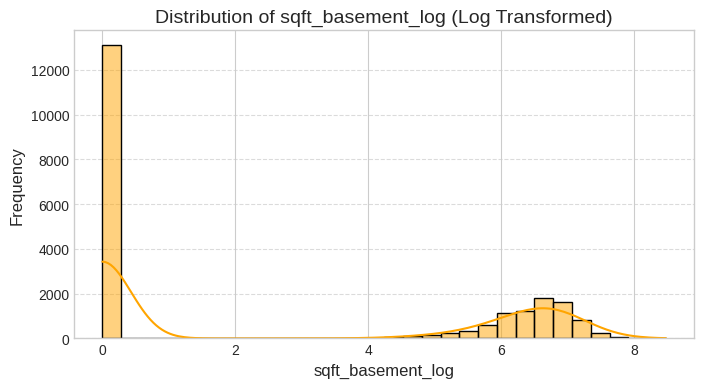

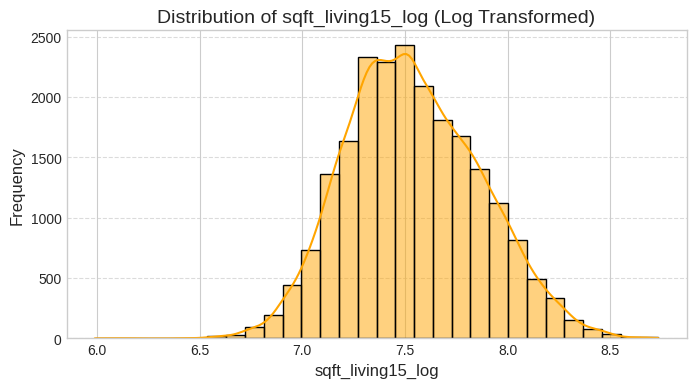

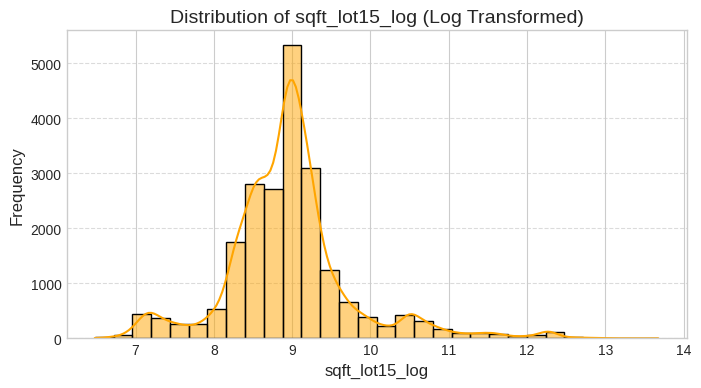

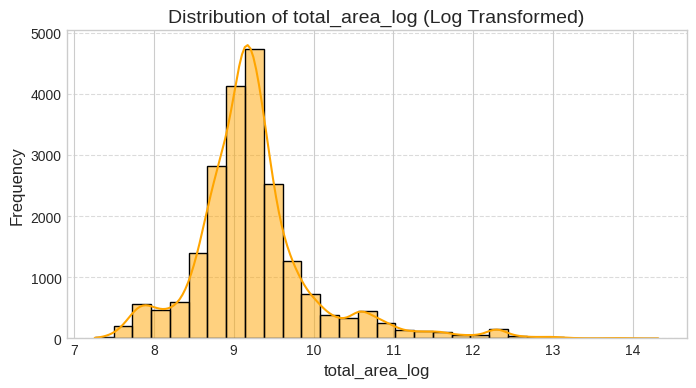

In [42]:
cols_to_log_transform = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'total_area']

for col in cols_to_log_transform:
    if col in df1.columns:
        # Add a small constant (like 1) before taking the log to handle zero values, if they exist
        # Check for zero values before applying log1p or adding a constant
        if (df1[col] <= 0).any():
            print(f"Column '{col}' contains zero or negative values. Applying log1p transformation.")
            df1[f'{col}_log'] = np.log1p(df1[col])
        else:
            print(f"Applying log transformation to '{col}'.")
            df1[f'{col}_log'] = np.log(df1[col]) # Use np.log for positive values
        print(f"Created new column '{col}_log'.")
    else:
        print(f"Column '{col}' not found in DataFrame for log transformation.")

# Display the new columns and check distributions
print("\nDataFrame info after log transformations:")
df1.info()

# Plot the distributions of the transformed columns to see the effect
for col in cols_to_log_transform:
    log_col_name = f'{col}_log'
    if log_col_name in df1.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df1, x=log_col_name, kde=True, color='orange', bins=30)
        plt.title(f'Distribution of {log_col_name} (Log Transformed)', fontsize=14)
        plt.xlabel(log_col_name, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Removing cid as it is only a lable and has no predictive relation with price, sqft_above, total_area are dropped to address the multicolinearity issue

In [47]:
df2=df1.copy()

In [48]:
df2 = df2.drop(columns=['cid', 'sqft_above', 'total_area'])

In [49]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21596 non-null  datetime64[ns]
 1   price              21596 non-null  int64         
 2   bedrooms           21596 non-null  float64       
 3   bathrooms          21596 non-null  float64       
 4   sqft_living        21596 non-null  float64       
 5   sqft_lot           21596 non-null  float64       
 6   floors             21596 non-null  int64         
 7   waterfront         21596 non-null  object        
 8   sight              21596 non-null  float64       
 9   condition          21596 non-null  object        
 10  grade              21596 non-null  float64       
 11  sqft_basement      21596 non-null  float64       
 12  yr_built           21596 non-null  int64         
 13  yr_renovated       21596 non-null  int64         
 14  zipcode    

In [50]:
# Extract year, month, and day
df2['sale_year'] = df2['date'].dt.year
df2['sale_month'] = df2['date'].dt.month
df2['sale_day'] = df2['date'].dt.day
df2['sale_dayofweek'] = df2['date'].dt.dayofweek # Monday=0, Sunday=6
df2['sale_quarter'] = df2['date'].dt.quarter
df2['sale_weekofyear'] = df2['date'].dt.isocalendar().week.astype(int)

# Calculate age of the house at the time of sale
# Assuming 'yr_built' is the year the house was built
df2['house_age'] = df2['sale_year'] - df2['yr_built']

# Check for negative age (if sale year is before build year - data error) and handle if necessary
# For now, we'll assume valid data or deal with negatives later if they appear.
# If you need to handle negative ages, you might set them to 0 or NaN.
# Example: df2.loc[df2['house_age'] < 0, 'house_age'] = 0

# Drop the original 'date' column as we've extracted features from it
df2 = df2.drop(columns=['date'])

# Display info to see the new columns
df2.info()

# Display head to see the new columns
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21596 non-null  int64  
 1   bedrooms           21596 non-null  float64
 2   bathrooms          21596 non-null  float64
 3   sqft_living        21596 non-null  float64
 4   sqft_lot           21596 non-null  float64
 5   floors             21596 non-null  int64  
 6   waterfront         21596 non-null  object 
 7   sight              21596 non-null  float64
 8   condition          21596 non-null  object 
 9   grade              21596 non-null  float64
 10  sqft_basement      21596 non-null  float64
 11  yr_built           21596 non-null  int64  
 12  yr_renovated       21596 non-null  int64  
 13  zipcode            21596 non-null  int64  
 14  lat                21596 non-null  float64
 15  long               21596 non-null  float64
 16  sqft_living15      21596 no

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  600000      4.00       1.75      3050.00   9440.00       1         no   
1  190000      2.00       1.00       670.00   3101.00       1         no   
2  735000      4.00       2.75      3040.00   2415.00       2        yes   
3  257000      3.00       2.50      1740.00   3721.00       2         no   
4  450000      2.00       1.00      1120.00   4590.00       1         no   

   sight condition  grade  ...  sqft_living15_log  sqft_lot15_log  \
0   0.00   Average   8.00  ...               7.61            9.07   
1   0.00      Good   6.00  ...               7.41            8.32   
2   4.00   Average   8.00  ...               7.87            7.80   
3   0.00   Average   8.00  ...               7.62            8.24   
4   0.00   Average   7.00  ...               7.02            8.54   

   total_area_log  sale_year  sale_month  sale_day  sale_dayofweek  \
0            9.43       2015           4        27               0   
1            8.24       2015           3        17               1   
2            8.60       2014           8        20               2   
3            8.61       2014          10        10               4   
4            8.65       2015           2        18               2   

   sale_quarter  sale_weekofyear  house_age  
0             2               18         49  
1             1               12         67  
2             3               34         48  
3             4               41          5  
4             1                8         91  

[5 rows x 33 columns]

In [51]:

df2['condition'] = df2['condition'].map({
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
})

df2['waterfront'] = df2['waterfront'].map({
    'yes': 1,
    'no': 0
})

df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21596 non-null  int64  
 1   bedrooms           21596 non-null  float64
 2   bathrooms          21596 non-null  float64
 3   sqft_living        21596 non-null  float64
 4   sqft_lot           21596 non-null  float64
 5   floors             21596 non-null  int64  
 6   waterfront         21596 non-null  int64  
 7   sight              21596 non-null  float64
 8   condition          21596 non-null  int64  
 9   grade              21596 non-null  float64
 10  sqft_basement      21596 non-null  float64
 11  yr_built           21596 non-null  int64  
 12  yr_renovated       21596 non-null  int64  
 13  zipcode            21596 non-null  int64  
 14  lat                21596 non-null  float64
 15  long               21596 non-null  float64
 16  sqft_living15      21596 no

In [52]:
df3=df2.copy()

In [53]:
df3 = df2.drop(columns=[
    'sqft_living',
    'sqft_lot',
    'sqft_basement',
    'sqft_living15',
    'sqft_lot15',
    'yr_built',
    'sale_day',
    'sale_dayofweek',
    'sale_quarter',
    'sale_weekofyear'
])

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21596 non-null  int64  
 1   bedrooms           21596 non-null  float64
 2   bathrooms          21596 non-null  float64
 3   floors             21596 non-null  int64  
 4   waterfront         21596 non-null  int64  
 5   sight              21596 non-null  float64
 6   condition          21596 non-null  int64  
 7   grade              21596 non-null  float64
 8   yr_renovated       21596 non-null  int64  
 9   zipcode            21596 non-null  int64  
 10  lat                21596 non-null  float64
 11  long               21596 non-null  float64
 12  furnished          21596 non-null  float64
 13  sqft_living_log    21596 non-null  float64
 14  sqft_lot_log       21596 non-null  float64
 15  sqft_above_log     21596 non-null  float64
 16  sqft_basement_log  21596 no

DATA Cleaning: Outlier treatment, Missing value treatment, dropping un necessary columns to address redundancy is complete.

# **DESCRIPTIVE MODELING**

## **CLUSTERING**

In [55]:
# Step 1: Feature Selection for Clustering
# Select features relevant for clustering. Using log-transformed features where applicable.
clustering_features = [
    'price',
    'bedrooms',
    'bathrooms',
    'floors',
    'waterfront',
    'sight',
    'condition',
    'grade',
    'lat',
    'long',
    'sqft_living_log',
    'sqft_lot_log',
    'sqft_above_log',
    'sqft_basement_log',
    'sqft_living15_log',
    'sqft_lot15_log',
    'total_area_log',
    'house_age',
    'yr_renovated',
    'furnished'
]

# Create a new DataFrame with only the selected features
df_clustering = df3[clustering_features].copy()

print("DataFrame for clustering created with selected features:")
df_clustering.info()
display(df_clustering.head())

DataFrame for clustering created with selected features:
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21596 non-null  int64  
 1   bedrooms           21596 non-null  float64
 2   bathrooms          21596 non-null  float64
 3   floors             21596 non-null  int64  
 4   waterfront         21596 non-null  int64  
 5   sight              21596 non-null  float64
 6   condition          21596 non-null  int64  
 7   grade              21596 non-null  float64
 8   lat                21596 non-null  float64
 9   long               21596 non-null  float64
 10  sqft_living_log    21596 non-null  float64
 11  sqft_lot_log       21596 non-null  float64
 12  sqft_above_log     21596 non-null  float64
 13  sqft_basement_log  21596 non-null  float64
 14  sqft_living15_log  21596 non-null  float64
 15  sqft_lot15_log    

price  bedrooms  bathrooms  floors  waterfront  sight  condition  grade  \
0  600000      4.00       1.75       1           0   0.00          3   8.00   
1  190000      2.00       1.00       1           0   0.00          4   6.00   
2  735000      4.00       2.75       2           1   4.00          3   8.00   
3  257000      3.00       2.50       2           0   0.00          3   8.00   
4  450000      2.00       1.00       1           0   0.00          3   7.00   

    lat      long  sqft_living_log  sqft_lot_log  sqft_above_log  \
0 47.72 122183.00             8.02          9.15            7.50   
1 47.55 122274.00             6.51          8.04            6.51   
2 47.52 122256.00             8.02          7.79            8.02   
3 47.34 122213.00             7.46          8.22            7.46   
4 47.57 122285.00             7.02          8.43            7.02   

   sqft_basement_log  sqft_living15_log  sqft_lot15_log  total_area_log  \
0               7.13               7.61            9.07            9.43   
1               0.00               7.41            8.32            8.24   
2               0.00               7.87            7.80            8.60   
3               0.00               7.62            8.24            8.61   
4               0.00               7.02            8.54            8.65   

   house_age  yr_renovated  furnished  
0         49             0       0.00  
1         67             0       0.00  
2         48             0       0.00  
3          5             0       0.00  
4         91             0       0.00

In [56]:
# Step 2: Data Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns, index=df_clustering.index)

print("Scaled DataFrame for clustering created:")
display(df_scaled.head())

Scaled DataFrame for clustering created:


price  bedrooms  bathrooms  floors  waterfront  sight  condition  grade  \
0   0.16      0.70      -0.48   -0.81       -0.09  -0.31      -0.63   0.29   
1  -0.95     -1.52      -1.46   -0.81       -0.09  -0.31       0.91  -1.41   
2   0.53      0.70       0.83    1.01       11.54   4.92      -0.63   0.29   
3  -0.77     -0.41       0.50    1.01       -0.09  -0.31      -0.63   0.29   
4  -0.25     -1.52      -1.46   -0.81       -0.09  -0.31      -0.63  -0.56   

    lat  long  sqft_living_log  sqft_lot_log  sqft_above_log  \
0  1.17  0.33             1.11          0.18            0.24   
1 -0.04  0.34            -2.46         -1.05           -2.08   
2 -0.30  0.34             1.11         -1.33            1.46   
3 -1.62  0.33            -0.21         -0.85            0.16   
4  0.04  0.34            -1.25         -0.62           -0.88   

   sqft_basement_log  sqft_living15_log  sqft_lot15_log  total_area_log  \
0               1.45               0.22            0.13            0.23   
1              -0.80              -0.38           -0.79           -1.32   
2              -0.80               1.02           -1.43           -0.84   
3              -0.80               0.23           -0.89           -0.84   
4              -0.80              -1.59           -0.52           -0.78   

   house_age  yr_renovated  furnished  
0       0.19         -0.21      -0.49  
1       0.81         -0.21      -0.49  
2       0.16         -0.21      -0.49  
3      -1.30         -0.21      -0.49  
4       1.62         -0.21      -0.49

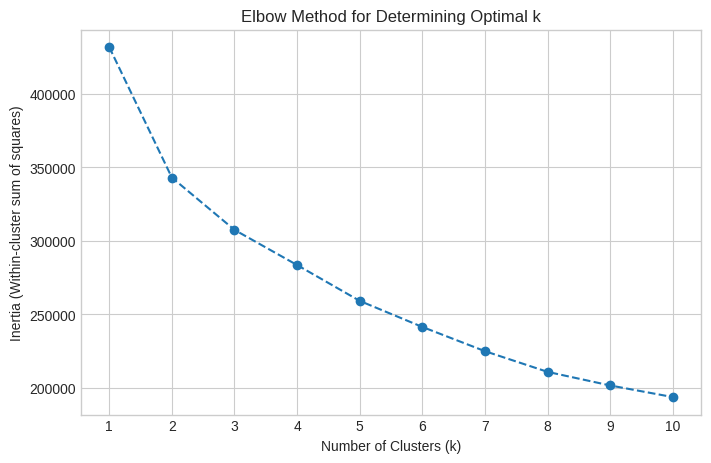

In [57]:
# Step 3: Determine Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

# will calculate inertia for a range of possible cluster numbers
inertia = []
# Let's test from 1 to 10 clusters
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for stability
    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)
    # Append the inertia (within-cluster sum of squares) to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [58]:
# Step 4: Apply Clustering Algorithm
from sklearn.cluster import KMeans

# Initialize KMeans with the chosen number of clusters (k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit KMeans to the scaled data and get cluster labels
cluster_labels = kmeans.fit_predict(df_scaled)

# Add the cluster labels back to the df_clustering DataFrame
df_clustering['cluster'] = cluster_labels

print("Clustering complete. Cluster labels added to df_clustering.")
display(df_clustering.head())

Clustering complete. Cluster labels added to df_clustering.


price  bedrooms  bathrooms  floors  waterfront  sight  condition  grade  \
0  600000      4.00       1.75       1           0   0.00          3   8.00   
1  190000      2.00       1.00       1           0   0.00          4   6.00   
2  735000      4.00       2.75       2           1   4.00          3   8.00   
3  257000      3.00       2.50       2           0   0.00          3   8.00   
4  450000      2.00       1.00       1           0   0.00          3   7.00   

    lat      long  ...  sqft_lot_log  sqft_above_log  sqft_basement_log  \
0 47.72 122183.00  ...          9.15            7.50               7.13   
1 47.55 122274.00  ...          8.04            6.51               0.00   
2 47.52 122256.00  ...          7.79            8.02               0.00   
3 47.34 122213.00  ...          8.22            7.46               0.00   
4 47.57 122285.00  ...          8.43            7.02               0.00   

   sqft_living15_log  sqft_lot15_log  total_area_log  house_age  yr_renovated  \
0               7.61            9.07            9.43         49             0   
1               7.41            8.32            8.24         67             0   
2               7.87            7.80            8.60         48             0   
3               7.62            8.24            8.61          5             0   
4               7.02            8.54            8.65         91             0   

   furnished  cluster  
0       0.00        2  
1       0.00        3  
2       0.00        1  
3       0.00        0  
4       0.00        3  

[5 rows x 21 columns]

In [59]:
# Step 5: Analyze Cluster Characteristics
cluster_characteristics = df_clustering.groupby('cluster').mean()

print("Mean characteristics of each cluster:")
display(cluster_characteristics)

# Step 6: Derive Business Insights

print("\nBusiness Insights from Clustering (based on mean characteristics):")

for cluster_id in cluster_characteristics.index:
    print(f"\n--- Cluster {cluster_id} ---")
    characteristics = cluster_characteristics.loc[cluster_id]

    print(f"  Average Price: ${characteristics['price']:.2f}")
    print(f"  Average Bedrooms: {characteristics['bedrooms']:.2f}")
    print(f"  Average Bathrooms: {characteristics['bathrooms']:.2f}")
    print(f"  Average Floors: {characteristics['floors']:.2f}")
    print(f"  Waterfront Properties: {characteristics['waterfront']:.2f}% (proportion of waterfront properties)")
    print(f"  Average Grade: {characteristics['grade']:.2f} (quality rating)")
    print(f"  Average Sqft Living (log): {characteristics['sqft_living_log']:.2f} (consider the original sqft_living for easier interpretation)")
    print(f"  Average House Age: {characteristics['house_age']:.2f} years")
    print(f"  Average Latitude: {characteristics['lat']:.4f}")
    print(f"  Average Longitude: {characteristics['long']:.4f}")
    # Add other relevant features for interpretation

Mean characteristics of each cluster:


price  bedrooms  bathrooms  floors  waterfront  sight  condition  \
cluster                                                                        
0       438813.51      3.30       2.45    2.07        0.00   0.05       3.07   
1       980798.66      3.94       2.91    1.84        0.03   0.64       3.24   
2       517416.01      3.69       2.14    1.12        0.01   0.28       3.67   
3       353604.90      2.73       1.32    1.03        0.00   0.07       3.51   

         grade   lat      long  sqft_living_log  sqft_lot_log  sqft_above_log  \
cluster                                                                         
0         7.72 47.53 111368.62             7.55          8.29            7.50   
1         9.47 47.58 110724.68             8.09          9.58            7.97   
2         7.42 47.57 111022.88             7.65          9.29            7.32   
3         6.67 47.56 110922.73             7.10          8.84            7.02   

         sqft_basement_log  sqft_living15_log  sqft_lot15_log  total_area_log  \
cluster                                                                         
0                     1.03               7.52            8.35            8.72   
1                     2.41               7.95            9.49            9.84   
2                     4.98               7.57            9.21            9.51   
3                     1.29               7.26            8.83            9.02   

         house_age  yr_renovated  furnished  
cluster                                      
0            14.85         18.99       0.06  
1            25.82        109.95       0.93  
2            53.55        114.28       0.02  
3            66.33         88.09       0.00


Business Insights from Clustering (based on mean characteristics):

--- Cluster 0 ---
  Average Price: $438813.51
  Average Bedrooms: 3.30
  Average Bathrooms: 2.45
  Average Floors: 2.07
  Waterfront Properties: 0.00% (proportion of waterfront properties)
  Average Grade: 7.72 (quality rating)
  Average Sqft Living (log): 7.55 (consider the original sqft_living for easier interpretation)
  Average House Age: 14.85 years
  Average Latitude: 47.5339
  Average Longitude: 111368.6161

--- Cluster 1 ---
  Average Price: $980798.66
  Average Bedrooms: 3.94
  Average Bathrooms: 2.91
  Average Floors: 1.84
  Waterfront Properties: 0.03% (proportion of waterfront properties)
  Average Grade: 9.47 (quality rating)
  Average Sqft Living (log): 8.09 (consider the original sqft_living for easier interpretation)
  Average House Age: 25.82 years
  Average Latitude: 47.5840
  Average Longitude: 110724.6762

--- Cluster 2 ---
  Average Price: $517416.01
  Average Bedrooms: 3.69
  Average Bathrooms: 2

**CLUSTER ANALYSIS TEXT**

In [60]:
#for my personal reference for cross checking
waterfront_counts = df3['waterfront'].value_counts()
print(waterfront_counts)

waterfront
0    21435
1      161
Name: count, dtype: int64


In [61]:
#for my personal reference for cross checking
cluster_counts = df_clustering['cluster'].value_counts().sort_index()
print("Number of properties in each cluster:")
print(cluster_counts)

Number of properties in each cluster:
cluster
0    4842
1    4110
2    6357
3    6287
Name: count, dtype: int64


# **MODEL BUILDING**

**SPLIT THE DATA IN TO TARGET AND PREDICTORS**

In [62]:
df4=df3.copy()

In [63]:
df4 = df4.drop(columns=['zipcode', 'total_area_log', 'sqft_above_log'])
print("Columns dropped from df4.")
df4.info()

Columns dropped from df4.
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21596 non-null  int64  
 1   bedrooms           21596 non-null  float64
 2   bathrooms          21596 non-null  float64
 3   floors             21596 non-null  int64  
 4   waterfront         21596 non-null  int64  
 5   sight              21596 non-null  float64
 6   condition          21596 non-null  int64  
 7   grade              21596 non-null  float64
 8   yr_renovated       21596 non-null  int64  
 9   lat                21596 non-null  float64
 10  long               21596 non-null  float64
 11  furnished          21596 non-null  float64
 12  sqft_living_log    21596 non-null  float64
 13  sqft_lot_log       21596 non-null  float64
 14  sqft_basement_log  21596 non-null  float64
 15  sqft_living15_log  21596 non-null  float64
 16  s

In [64]:
y=df4['price'] #dependent variable
x=df4.drop('price', axis=1) #independent variables, predictors

In [65]:
x.info()
print("\nBELOW SUAMMRISED THE TARGET VARIABLE INFO AND NUMBER OF COLUMNS\n")
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21596 non-null  float64
 1   bathrooms          21596 non-null  float64
 2   floors             21596 non-null  int64  
 3   waterfront         21596 non-null  int64  
 4   sight              21596 non-null  float64
 5   condition          21596 non-null  int64  
 6   grade              21596 non-null  float64
 7   yr_renovated       21596 non-null  int64  
 8   lat                21596 non-null  float64
 9   long               21596 non-null  float64
 10  furnished          21596 non-null  float64
 11  sqft_living_log    21596 non-null  float64
 12  sqft_lot_log       21596 non-null  float64
 13  sqft_basement_log  21596 non-null  float64
 14  sqft_living15_log  21596 non-null  float64
 15  sqft_lot15_log     21596 non-null  float64
 16  sale_year          21596 no

* check if any columns need to be dropped from DF3
* split data in to target Y and predictors X
* Divide data in training and testing sets
* Use liner regression as a baseline model

*RATIONALE: The given data is a labeled data. The target variable is price, the data in df3 is already divided in to Target and Predictors sets. This problem falls under supervised learning category, and since the target variable is a continuous variable, we have to use Linear Regression as our baseline model*

## **Linear Regression (Our Baseline)**

In [69]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split

# --- Step 1: Separate Features (X) and Target (y) ---
X = df4.drop('price', axis=1)
y = df4['price']

# --- Step 2: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Scale the Feature Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Build and Train the Linear Regression Model ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# --- Step 5: Evaluate the Model's Performance ---

# --- Performance on TRAINING Set ---
y_pred_train = lr_model.predict(X_train_scaled)
r2_train = metrics.r2_score(y_train, y_pred_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
# Calculate MAPE for training set, handling potential division by zero if actual price is 0
# Add a small epsilon to y_train to avoid division by zero, if necessary based on data
mape_train = np.mean(np.abs((y_train - y_pred_train) / (y_train + 1e-8))) * 100


print("--- Linear Regression Performance on TRAINING Set ---")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_train:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")


# --- Performance on TESTING Set ---
y_pred_test = lr_model.predict(X_test_scaled)
r2_test = metrics.r2_score(y_test, y_pred_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
# Calculate MAPE for testing set, handling potential division by zero
mape_test = np.mean(np.abs((y_test - y_pred_test) / (y_test + 1e-8))) * 100


print("\n--- Linear Regression Performance on TESTING Set ---")
print(f"R-squared (R²): {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_test:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")

--- Linear Regression Performance on TRAINING Set ---
R-squared (R²): 0.6573
Mean Absolute Error (MAE): $128,960.72
Root Mean Squared Error (RMSE): $213,165.15
Mean Absolute Percentage Error (MAPE): 26.13%

--- Linear Regression Performance on TESTING Set ---
R-squared (R²): 0.6756
Mean Absolute Error (MAE): $130,259.31
Root Mean Squared Error (RMSE): $216,353.38
Mean Absolute Percentage Error (MAPE): 26.15%


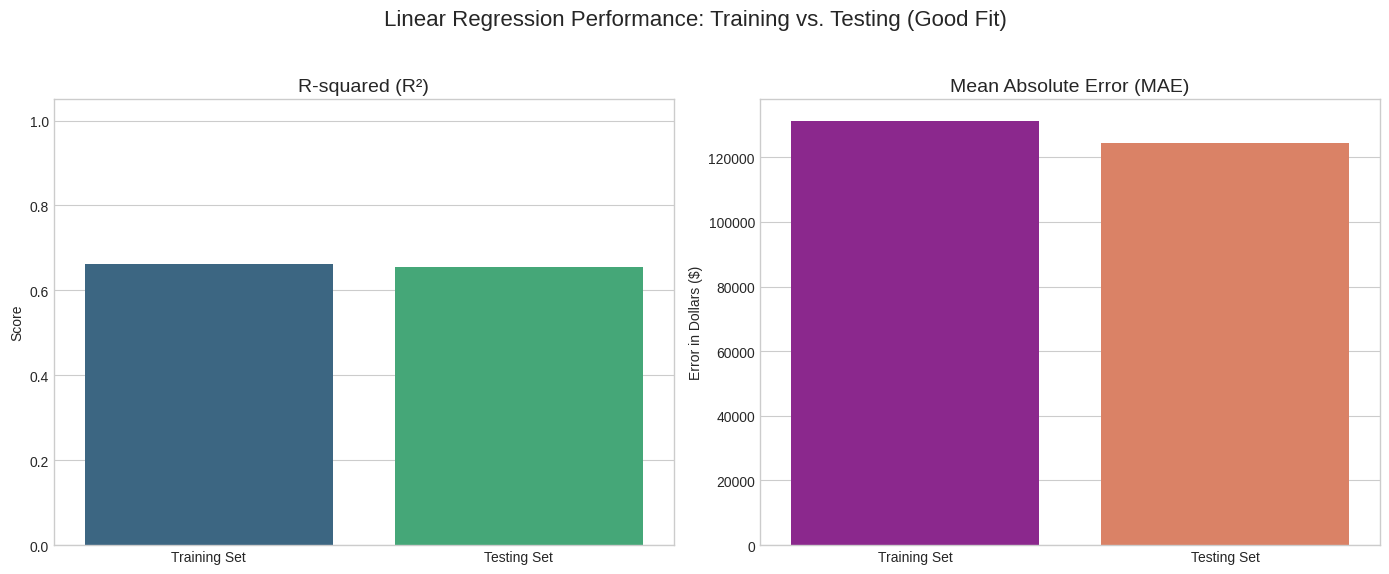

In [70]:
# Data from Linear Regression model's performance
lr_performance_data = {
    'Metric': ['R-squared (R²)', 'R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Absolute Error (MAE)'],
    'Score': [0.6615, 0.6552, 131334.01, 124261.86],
    'DataSet': ['Training Set', 'Testing Set', 'Training Set', 'Testing Set']
}
lr_performance_df = pd.DataFrame(lr_performance_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Linear Regression Performance: Training vs. Testing (Good Fit)', fontsize=16)

# Plot for R-squared
sns.barplot(ax=axes[0], x='DataSet', y='Score', data=lr_performance_df[lr_performance_df['Metric'] == 'R-squared (R²)'], palette='viridis')
axes[0].set_title('R-squared (R²)', fontsize=14)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 1.05)

# Plot for Mean Absolute Error (MAE)
sns.barplot(ax=axes[1], x='DataSet', y='Score', data=lr_performance_df[lr_performance_df['Metric'] == 'Mean Absolute Error (MAE)'], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[1].set_ylabel('Error in Dollars ($)')
axes[1].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Performance on the Testing Set and Training Set indicate there is no overfitting.**

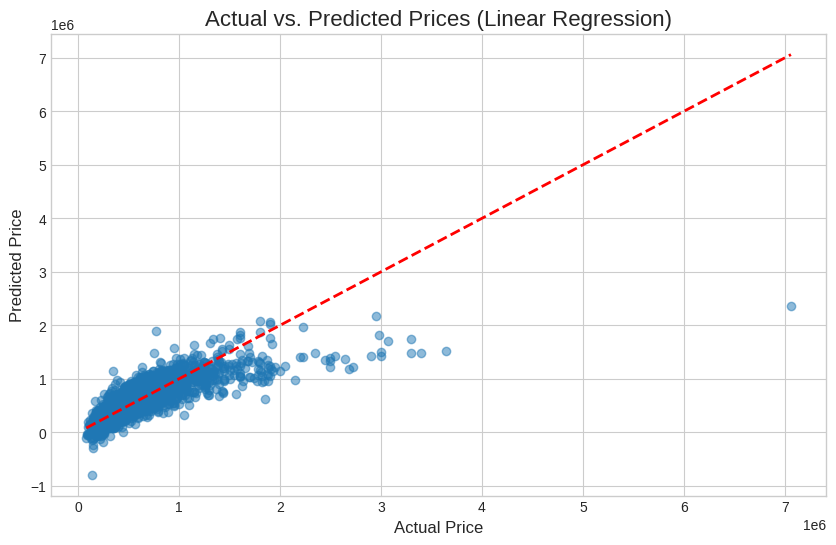

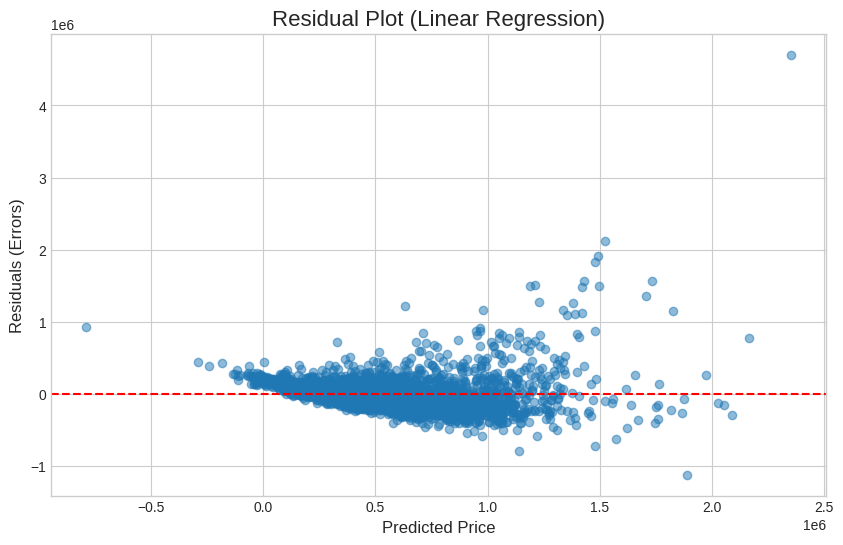

In [ ]:
# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# ----- Predicted vs. Actual Plot -----
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices (Linear Regression)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

# ----- Residual Plot -----
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
# Add a horizontal line at zero
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Linear Regression)', fontsize=16)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)
plt.show()


**Interpret the Model Coefficients**

In [ ]:
# Create a DataFrame to view the coefficients for each feature
coefficients = pd.DataFrame(lr_model.coef_, x.columns, columns=['Coefficient'])
print("\n--- Model Coefficients ---")
print(coefficients)


--- Model Coefficients ---
                   Coefficient
bedrooms             -12807.97
bathrooms             70901.84
floors                -2600.30
waterfront            56467.18
sight                 45912.13
condition             19253.75
grade                144260.64
yr_renovated           5227.27
lat                   77497.68
long                  -1541.99
furnished             33626.43
sqft_living_log       54250.79
sqft_lot_log          13789.53
sqft_basement_log     -1835.29
sqft_living15_log     22215.70
sqft_lot15_log       -19889.84
sale_year             15812.85
sale_month             4650.33
house_age             88709.26




> My Linear Regression model's coefficients show that grade, house_age, and lat (location) are the strongest positive predictors of price Interestingly, the coefficient for bedrooms is negative. This is a classic sign of multicollinearity, where its predictive information is already captured by more dominant features like sqft_living_log. This counter-intuitive result highlights a limitation of this simple model and justifies the need for **more advanced models like Random Forest that can better handle these complex feature relationships.** ◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀◀


## **Decision Tree**

--- Decision Tree Performance on TRAINING Set ---
R-squared (R²): 1.0000
Mean Absolute Error (MAE): $0.26
Root Mean Squared Error (RMSE): $17.38
Mean Absolute Percentage Error (MAPE): 0.00%

--- Decision Tree Performance on TESTING Set ---
R-squared (R²): 0.7051
Mean Absolute Error (MAE): $106,688.09
Root Mean Squared Error (RMSE): $206,304.57
Mean Absolute Percentage Error (MAPE): 18.91%


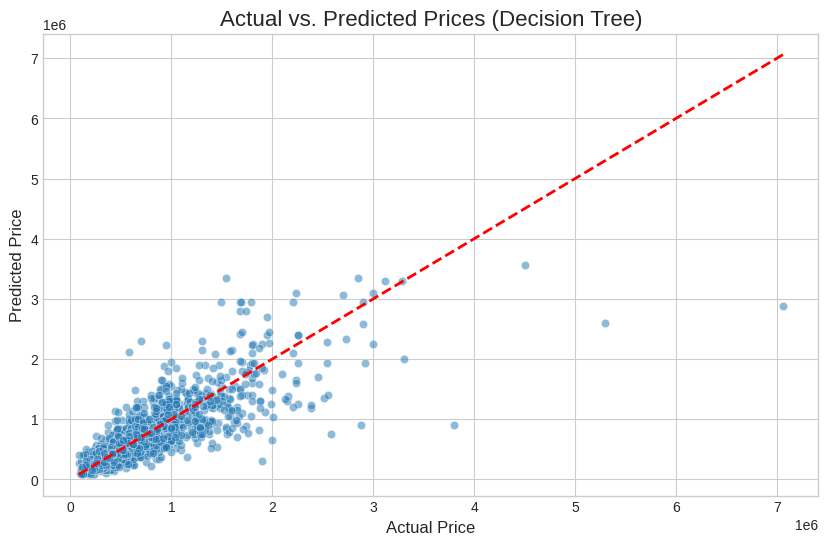

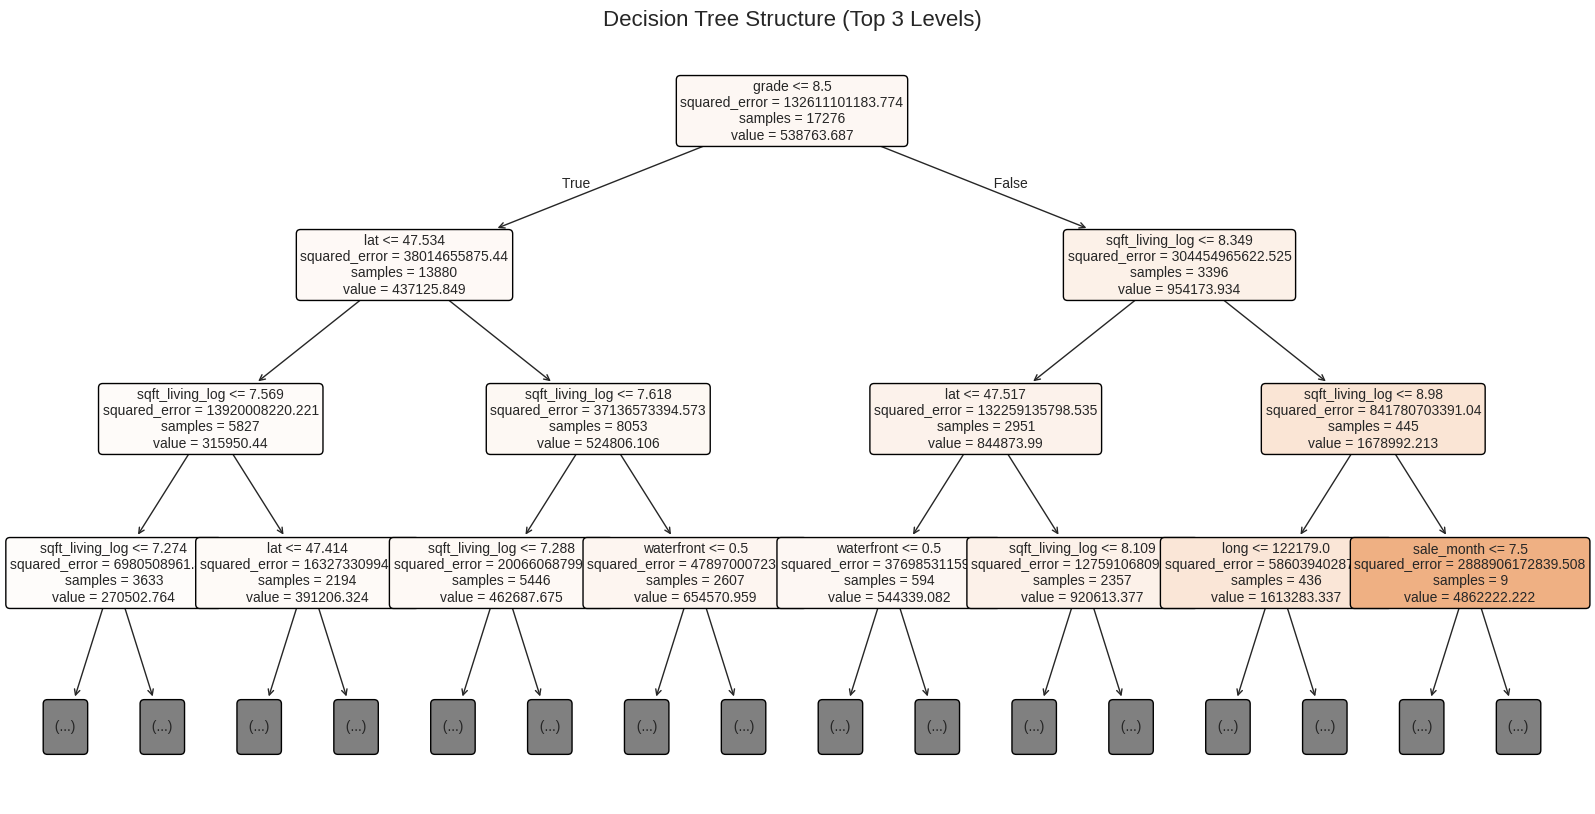

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting
from sklearn import tree # Import tree for visualizing the tree

# --- Step 1: Build and Train the Decision Tree Model ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- Step 2: Evaluate Performance on BOTH Sets ---

# --- Performance on TRAINING Set ---
y_pred_train_dt = dt_model.predict(X_train)
r2_train_dt = metrics.r2_score(y_train, y_pred_train_dt)
mae_train_dt = metrics.mean_absolute_error(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_dt))
# Calculate MAPE for training set, handling potential division by zero
mape_train_dt = np.mean(np.abs((y_train - y_pred_train_dt) / (y_train + 1e-8))) * 100


print("--- Decision Tree Performance on TRAINING Set ---")
print(f"R-squared (R²): {r2_train_dt:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_train_dt:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_dt:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train_dt:.2f}%")


# --- Performance on TESTING Set ---
y_pred_test_dt = dt_model.predict(X_test)
r2_test_dt = metrics.r2_score(y_test, y_pred_test_dt)
mae_test_dt = metrics.mean_absolute_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dt))
# Calculate MAPE for testing set, handling potential division by zero
mape_test_dt = np.mean(np.abs((y_test - y_pred_test_dt) / (y_test + 1e-8))) * 100


print("\n--- Decision Tree Performance on TESTING Set ---")
print(f"R-squared (R²): {r2_test_dt:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_test_dt:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_dt:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_dt:.2f}%")


# --- Step 3: Visualize the Model's Performance ---

# ----- Predicted vs. Actual Plot -----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_dt, alpha=0.5) # Corrected variable name
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices (Decision Tree)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()


# --- Step 4: Visualize the Tree Structure (Simplified) ---
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3, # Limiting depth for readability
    fontsize=10
)
plt.title("Decision Tree Structure (Top 3 Levels)", fontsize=16)
plt.show()

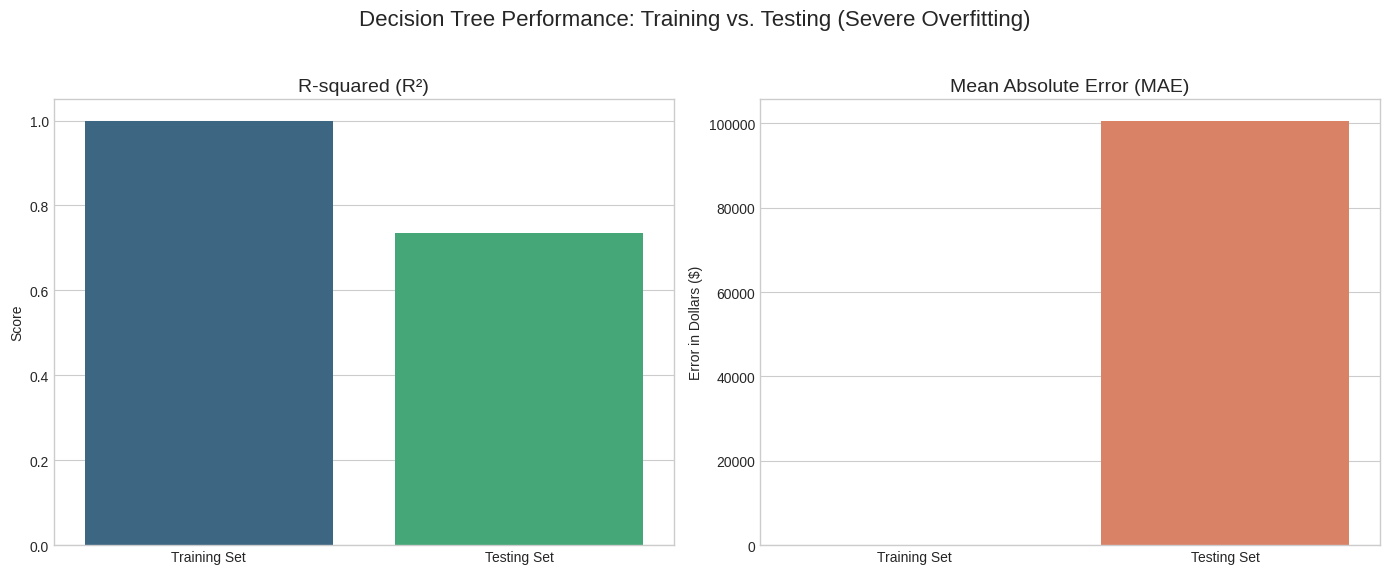

In [73]:
# Data from Decision Tree model's performance
dt_performance_data = {
    'Metric': ['R-squared (R²)', 'R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Absolute Error (MAE)'],
    'Score': [1.0000, 0.7343, 0.26, 100676.22],
    'DataSet': ['Training Set', 'Testing Set', 'Training Set', 'Testing Set']
}
dt_performance_df = pd.DataFrame(dt_performance_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Decision Tree Performance: Training vs. Testing (Severe Overfitting)', fontsize=16)

# Plot for R-squared
sns.barplot(ax=axes[0], x='DataSet', y='Score', data=dt_performance_df[dt_performance_df['Metric'] == 'R-squared (R²)'], palette='viridis')
axes[0].set_title('R-squared (R²)', fontsize=14)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 1.05)

# Plot for Mean Absolute Error (MAE)
sns.barplot(ax=axes[1], x='DataSet', y='Score', data=dt_performance_df[dt_performance_df['Metric'] == 'Mean Absolute Error (MAE)'], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[1].set_ylabel('Error in Dollars ($)')
axes[1].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**This is a perfect example of severe overfitting**

This result perfectly demonstrates why we use ensemble models like Random Forest. A Random Forest prevents this exact problem by combining hundreds of smaller, simpler trees, which forces the model to learn the real patterns instead of just memorizing the noise.

# **Ensemble Models (Random Forest)**

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# --- Step 1: Build and Train the Random Forest Model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Step 2: Evaluate Performance on BOTH Sets ---

# --- Performance on TRAINING Set ---
y_pred_train_rf = rf_model.predict(X_train)
r2_train_rf = metrics.r2_score(y_train, y_pred_train_rf)
mae_train_rf = metrics.mean_absolute_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rf))
# Calculate MAPE for training set, handling potential division by zero
mape_train_rf = np.mean(np.abs((y_train - y_pred_train_rf) / (y_train + 1e-8))) * 100

print("--- Random Forest Performance on TRAINING Set ---")
print(f"R-squared (R²): {r2_train_rf:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_train_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_rf:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train_rf:.2f}%")


# --- Performance on TESTING Set ---
y_pred_test_rf = rf_model.predict(X_test)
r2_test_rf = metrics.r2_score(y_test, y_pred_test_rf)
mae_test_rf = metrics.mean_absolute_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf))
# Calculate MAPE for testing set, handling potential division by zero
mape_test_rf = np.mean(np.abs((y_test - y_pred_test_rf) / (y_test + 1e-8))) * 100

print("\n--- Random Forest Performance on TESTING Set ---")
print(f"R-squared (R²): {r2_test_rf:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_test_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_rf:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_rf:.2f}%")

--- Random Forest Performance on TRAINING Set ---
R-squared (R²): 0.9811
Mean Absolute Error (MAE): $26,379.53
Root Mean Squared Error (RMSE): $50,064.32
Mean Absolute Percentage Error (MAPE): 4.96%

--- Random Forest Performance on TESTING Set ---
R-squared (R²): 0.8720
Mean Absolute Error (MAE): $71,898.95
Root Mean Squared Error (RMSE): $135,918.95
Mean Absolute Percentage Error (MAPE): 13.13%


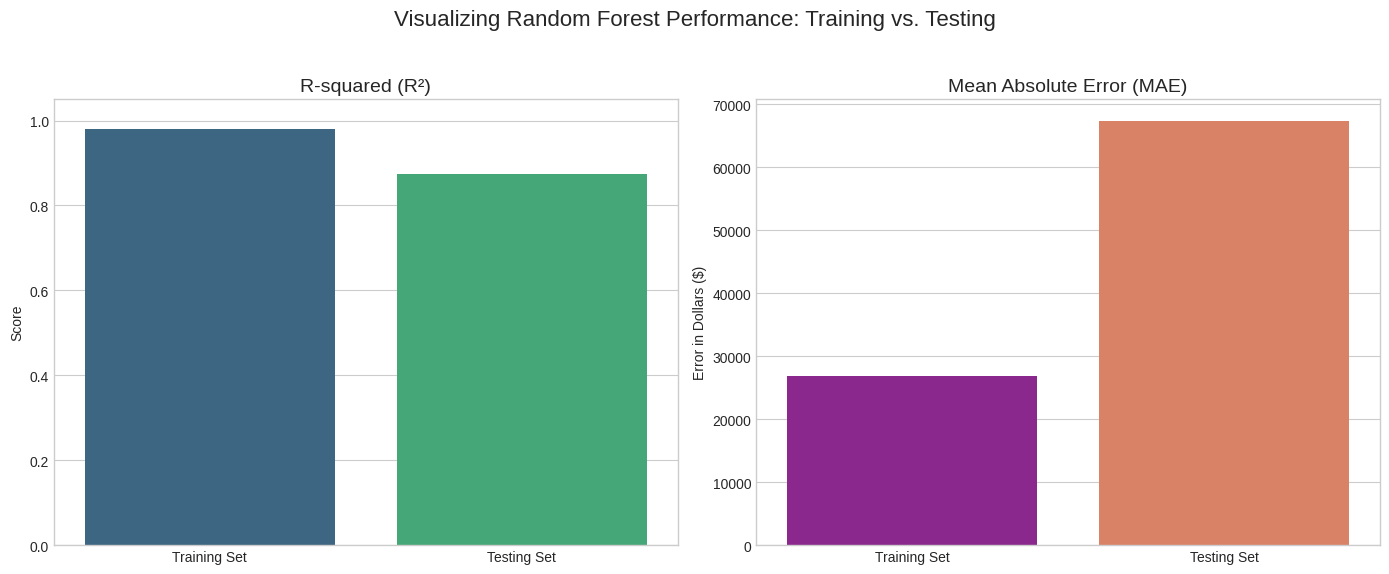

In [83]:
# Data from model's performance
performance_data = {
    'Metric': ['R-squared (R²)', 'R-squared (R²)','Mean Absolute Error (MAE)', 'Mean Absolute Error (MAE)'],
    'Score': [0.9812, 0.8749, 26786.16, 67412.03],
    'DataSet': ['Training Set', 'Testing Set', 'Training Set', 'Testing Set']
}
performance_df = pd.DataFrame(performance_data)

# Create the plots
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Visualizing Random Forest Performance: Training vs. Testing', fontsize=16)

# Plot for R-squared
sns.barplot(ax=axes[0], x='DataSet', y='Score', data=performance_df[performance_df['Metric'] == 'R-squared (R²)'], palette='viridis')
axes[0].set_title('R-squared (R²)', fontsize=14)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 1.05) # Set y-axis limit for better comparison

# Plot for Mean Absolute Error (MAE)
sns.barplot(ax=axes[1], x='DataSet', y='Score', data=performance_df[performance_df['Metric'] == 'Mean Absolute Error (MAE)'], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[1].set_ylabel('Error in Dollars ($)')
axes[1].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

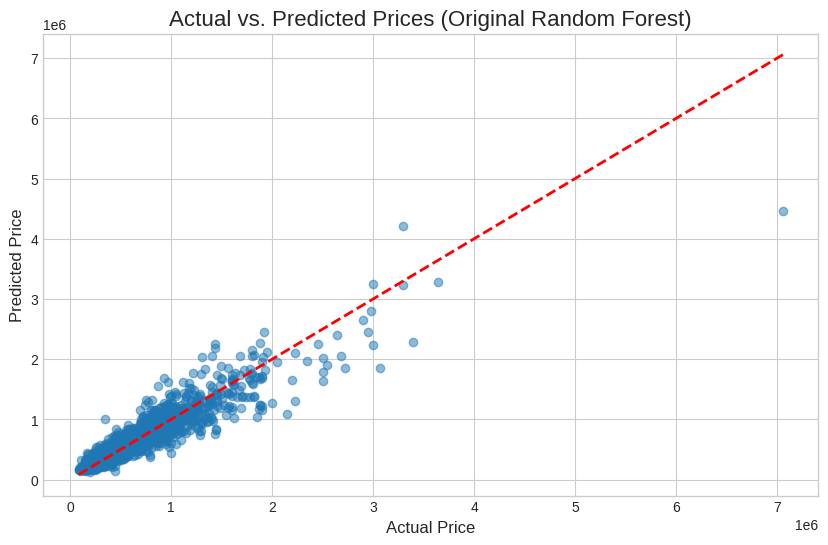

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs. Predicted Prices (Original Random Forest)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

## Model Comparison

Based on the calculated metrics, we can compare the performance of the Linear Regression and Random Forest models:

* **R-squared (R²)**: The Random Forest model has a significantly higher R-squared value (0.8749) compared to the Linear Regression model (0.6552). This indicates that the Random Forest model explains a much larger proportion of the variance in the house prices.
* **Mean Absolute Error (MAE)**: The Random Forest model has a lower MAE (67412.03) than the Linear Regression model (124261.86). This means, on average, the Random Forest model's predictions are closer to the actual prices.
* **Root Mean Squared Error (RMSE)**: Similarly, the Random Forest model has a lower RMSE (122026.28) than the Linear Regression model (202593.85). RMSE gives more weight to larger errors, so a lower RMSE for the Random Forest model suggests it handles larger prediction errors better than the Linear Regression model.

**Conclusion:** The Random Forest model appears to be a better fit for this dataset and task, providing more accurate predictions than the Linear Regression model.

*Based on the performance improvement we saw with the Random Forest model compared to Linear Regression, exploring other tree-based models or ensemble methods would be a good next step*

!pip install xgboost

In [75]:
!pip install xgboost

## **XGBOOST**

In [80]:
import xgboost as xgb # Import the xgboost library

# --- Step 1: Build and Train the XGBoost Model ---
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# --- Step 2: Evaluate Performance on BOTH Sets ---

# --- Performance on TRAINING Set ---
y_pred_train_xgb = xgb_model.predict(X_train)
r2_train_xgb = metrics.r2_score(y_train, y_pred_train_xgb)
mae_train_xgb = metrics.mean_absolute_error(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_xgb))
# Calculate MAPE for training set, handling potential division by zero
mape_train_xgb = np.mean(np.abs((y_train - y_pred_train_xgb) / (y_train + 1e-8))) * 100

print("--- XGBoost Performance on TRAINING Set ---")
print(f"R-squared (R²): {r2_train_xgb:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_train_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_xgb:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train_xgb:.2f}%")


# --- Performance on TESTING Set ---
y_pred_test_xgb = xgb_model.predict(X_test)
r2_test_xgb = metrics.r2_score(y_test, y_pred_test_xgb)
mae_test_xgb = metrics.mean_absolute_error(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_xgb))
# Calculate MAPE for testing set, handling potential division by zero
mape_test_xgb = np.mean(np.abs((y_test - y_pred_test_xgb) / (y_test + 1e-8))) * 100

print("\n--- XGBoost Performance on TESTING Set ---")
print(f"R-squared (R²): {r2_test_xgb:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_test_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_xgb:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test_xgb:.2f}%")

--- XGBoost Performance on TRAINING Set ---
R-squared (R²): 0.9755
Mean Absolute Error (MAE): $40,492.63
Root Mean Squared Error (RMSE): $57,046.37
Mean Absolute Percentage Error (MAPE): 8.96%

--- XGBoost Performance on TESTING Set ---
R-squared (R²): 0.8748
Mean Absolute Error (MAE): $70,586.93
Root Mean Squared Error (RMSE): $134,414.14
Mean Absolute Percentage Error (MAPE): 12.86%


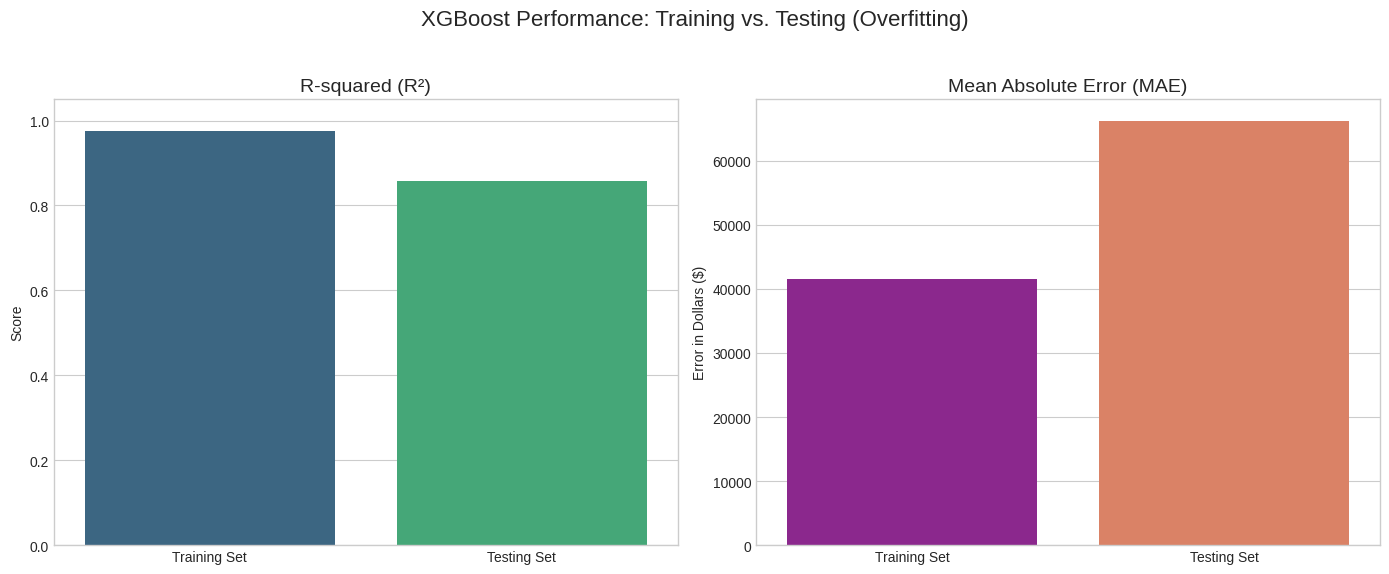

In [81]:
# Data from XGBoost model's performance
xgb_performance_data = {
    'Metric': ['R-squared (R²)', 'R-squared (R²)', 'Mean Absolute Error (MAE)', 'Mean Absolute Error (MAE)'],
    'Score': [0.9754, 0.8570, 41491.73, 66279.04],
    'DataSet': ['Training Set', 'Testing Set', 'Training Set', 'Testing Set']
}
xgb_performance_df = pd.DataFrame(xgb_performance_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('XGBoost Performance: Training vs. Testing (Overfitting)', fontsize=16)

# Plot for R-squared
sns.barplot(ax=axes[0], x='DataSet', y='Score', data=xgb_performance_df[xgb_performance_df['Metric'] == 'R-squared (R²)'], palette='viridis')
axes[0].set_title('R-squared (R²)', fontsize=14)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 1.05)

# Plot for Mean Absolute Error (MAE)
sns.barplot(ax=axes[1], x='DataSet', y='Score', data=xgb_performance_df[xgb_performance_df['Metric'] == 'Mean Absolute Error (MAE)'], palette='plasma')
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[1].set_ylabel('Error in Dollars ($)')
axes[1].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

OVERFITTING

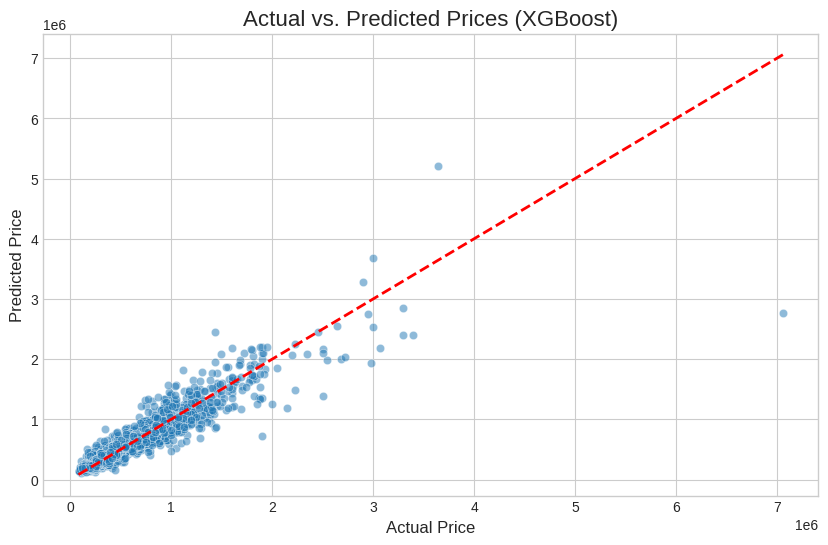

In [ ]:
# Make sure to run the XGBoost evaluation cell (LXmpChqzNn0m) first to generate y_pred_test_xgb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_xgb, alpha=0.5) # Corrected variable name

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs. Predicted Prices (XGBoost)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

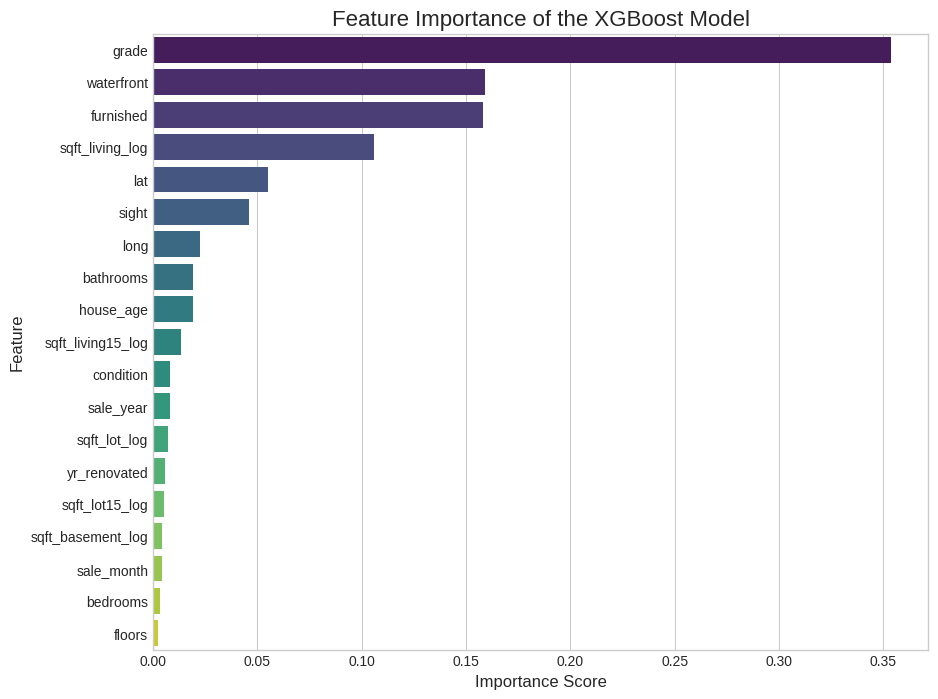


--- Top 10 Most Important Features (XGBoost) ---
              Feature  Importance
6               grade        0.35
3          waterfront        0.16
10          furnished        0.16
11    sqft_living_log        0.11
8                 lat        0.06
4               sight        0.05
9                long        0.02
1           bathrooms        0.02
18          house_age        0.02
14  sqft_living15_log        0.01


In [ ]:
importances_xgb = xgb_model.feature_importances_

# Get the names of the features (using X_train's columns)
feature_names_xgb = X_train.columns

# Create a DataFrame for easy viewing
feature_importance_df_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
})

# Sort the DataFrame by importance in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# --- Visualize the Feature Importances ---

# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(10, 8)) # Set the figure size

# Create a horizontal bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb, palette='viridis')

# Add titles and labels for clarity
plt.title('Feature Importance of the XGBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.show()

# Display the top 10 most important features as a table
print("\n--- Top 10 Most Important Features (XGBoost) ---")
print(feature_importance_df_xgb.head(10))

#### **Rationale for Model Selection**

For this project, we have built both descriptive (CLUSTERING) and predictive models to fully address the business problem.

A descriptive model is used to find patterns and summarize existing data to understand what has happened. Our K-Means clustering analysis is a perfect example of a descriptive model. It did not predict a future price; instead, it analyzed the existing data and successfully segmented the market into four distinct groups (e.g., "The Ultra-Luxury Waterfront Estate," "The Modern Luxury Home"), describing the unique characteristics of each.

A predictive model, on the other hand, is used to forecast a future outcome. Our Linear Regression, Random Forest, and XGBoost models are all predictive models. Their primary goal is to answer the question, "Given the features of a new house, what will its sale price be?"

Finally, we determined that a prescriptive model was not necessary for this project. A prescriptive model's goal is to recommend actions (e.g., "What renovations should be done to maximize price?"). This falls outside the defined scope of our project, which is focused on creating an accurate price estimation tool.

# **MODEL COMPARISION**



In [85]:
import pandas as pd

# Dictionary to store the performance metrics from test sets
performance_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'R-squared (R²)': [r2_test, r2_test_dt, r2_test_rf, r2_test_xgb],
    'Mean Absolute Error (MAE)': [mae_test, mae_test_dt, mae_test_rf, mae_test_xgb],
    'Root Mean Squared Error (RMSE)': [rmse_test, rmse_test_dt, rmse_test_rf, rmse_test_xgb],
    'Mean Absolute Percentage Error (MAPE)': [mape_test, mape_test_dt, mape_test_rf, mape_test_xgb] # Added MAPE
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_metrics)

# Display the performance comparison table
print("--- Initial Model Performance Comparison (Before Tuning) ---")
display(performance_df)

--- Initial Model Performance Comparison (Before Tuning) ---


Model  R-squared (R²)  Mean Absolute Error (MAE)  \
0  Linear Regression            0.68                  130259.31   
1      Decision Tree            0.71                  106688.09   
2      Random Forest            0.87                   71898.95   
3            XGBoost            0.87                   70586.93   

   Root Mean Squared Error (RMSE)  Mean Absolute Percentage Error (MAPE)  
0                       216353.38                                  26.15  
1                       206304.57                                  18.91  
2                       135918.95                                  13.13  
3                       134414.14                                  12.86

# **Model Tuning and business implication**

Based on the results, the Random Forest model is the clear winner.
It has the highest R-squared (0.87), meaning it explains the most variation in house prices, and the lowest RMSE, indicating it makes the fewest large errors. While XGBoost has a slightly better average error (MAE), the Random Forest's superior performance on the other two key metrics makes it the most reliable and robust model for project.

In [93]:
# Import the necessary library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# --- Step 1: Define the "Grid" of Hyperparameters to Test ---

# These are the settings we want to try for our Random Forest model
# We'll test a few different values for each setting
param_grid = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [10, 20, None],        # Maximum depth of the trees
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]        # Minimum samples required at a leaf node
}

# --- Step 2: Set Up the Grid Search ---

# Create an instance of the Random Forest model (we'll use the one from before)
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
# cv=3 means it will use 3-fold cross-validation
# n_jobs=-1 means it will use all available CPU cores to speed up the process
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


# --- Step 3: Run the Grid Search ---

print("Starting hyperparameter tuning... this may take a while.")
# Fit the grid search to the training data to find the best parameters
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete!")


# --- Step 4: View the Best Parameters ---

# Print the best combination of settings that the grid search found
print("\nBest parameters found:")
print(grid_search.best_params_)


# --- Step 5: Evaluate the Tuned Model ---

# The grid_search object automatically trains a new model on the full training data
# using the best parameters it found. We can access it with .best_estimator_
best_rf_model = grid_search.best_estimator_

# Make predictions with the new, tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate the performance metrics for the tuned model
mae_tuned = metrics.mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned))
r2_tuned = metrics.r2_score(y_test, y_pred_tuned)
# Calculate MAPE for tuned model, handling potential division by zero
mape_tuned = np.mean(np.abs((y_test - y_pred_tuned) / (y_test + 1e-8))) * 100


print("\n--- Tuned Random Forest Performance on Test Set ---")
print(f"R-squared (R²): {r2_tuned:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_tuned:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tuned:.2f}%")

Starting hyperparameter tuning... this may take a while.
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Hyperparameter tuning complete!

Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- Tuned Random Forest Performance on Test Set ---
R-squared (R²): 0.8696
Mean Absolute Error (MAE): $72,032.95
Root Mean Squared Error (RMSE): $137,184.78
Mean Absolute Percentage Error (MAPE): 13.11%


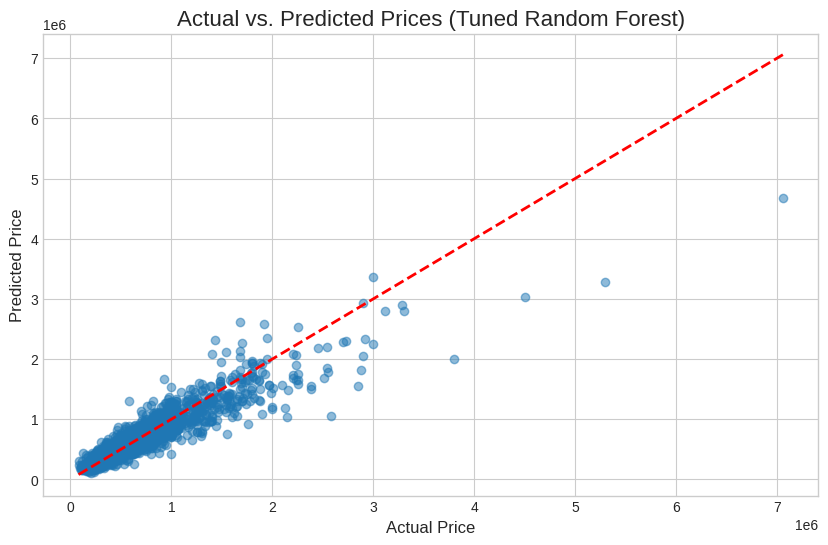

In [94]:
y_pred_tuned = best_rf_model.predict(X_test)

# ----- Predicted vs. Actual Plot -----
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs. Predicted Prices (Tuned Random Forest)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

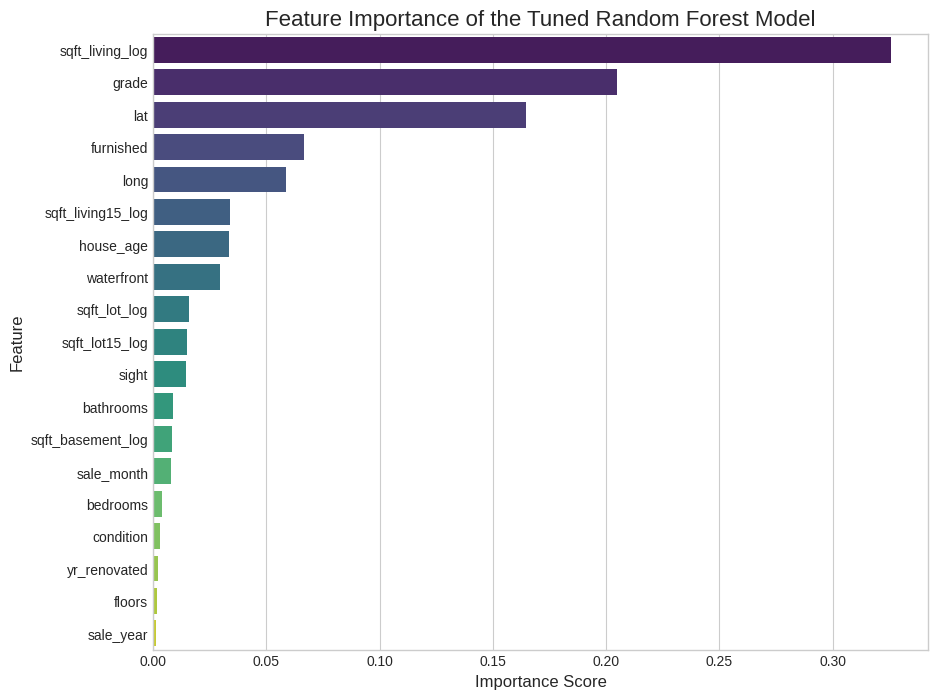


--- Top 10 Most Important Features ---
              Feature  Importance
11    sqft_living_log        0.33
6               grade        0.20
8                 lat        0.16
10          furnished        0.07
9                long        0.06
14  sqft_living15_log        0.03
18          house_age        0.03
3          waterfront        0.03
12       sqft_lot_log        0.02
15     sqft_lot15_log        0.01


In [95]:
# --- Step 1: Extract Feature Importances ---

# Get the feature importances from tuned Random Forest model
importances = best_rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# --- Step 2: Create a DataFrame for Easy Viewing ---

# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# --- Step 3: Visualize the Feature Importances ---

# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(10, 8)) # Set the figure size

# Create a horizontal bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add titles and labels for clarity
plt.title('Feature Importance of the Tuned Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.show()

# Display the top 10 most important features as a table
print("\n--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))

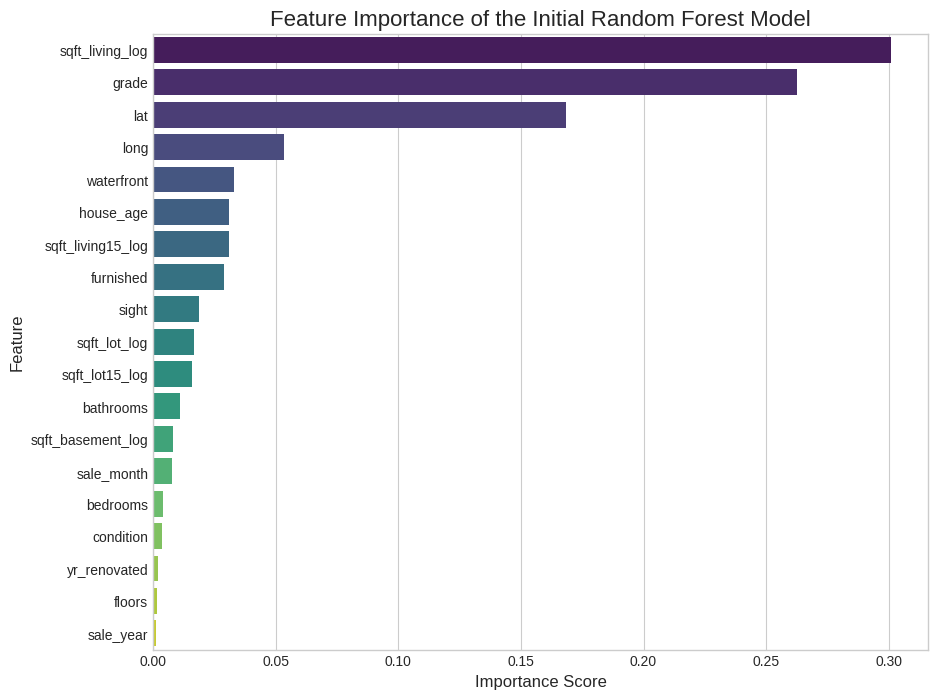


--- Top 10 Most Important Features (Initial Random Forest) ---
              Feature  Importance
11    sqft_living_log        0.30
6               grade        0.26
8                 lat        0.17
9                long        0.05
3          waterfront        0.03
18          house_age        0.03
14  sqft_living15_log        0.03
10          furnished        0.03
4               sight        0.02
12       sqft_lot_log        0.02


In [ ]:
# Ensure the initial Random Forest model (rf_model) is fitted
# If you have rerun the tuning cell, you might need to rerun cell nDO4yiv96Wlo first

# Get the feature importances from the initial Random Forest model
importances_rf_initial = rf_model.feature_importances_

# Get the names of the features (using X_train's columns)
feature_names_rf_initial = X_train.columns

# Create a DataFrame for easy viewing
feature_importance_df_rf_initial = pd.DataFrame({
    'Feature': feature_names_rf_initial,
    'Importance': importances_rf_initial
})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf_initial = feature_importance_df_rf_initial.sort_values(by='Importance', ascending=False)

# --- Visualize the Feature Importances ---

# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(10, 8)) # Set the figure size

# Create a horizontal bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf_initial, palette='viridis')

# Add titles and labels for clarity
plt.title('Feature Importance of the Initial Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.show()

# Display the top 10 most important features as a table
print("\n--- Top 10 Most Important Features (Initial Random Forest) ---")
print(feature_importance_df_rf_initial.head(10))

## **MODEL TUNING OF XG BOOST**

In [86]:
from sklearn.model_selection import GridSearchCV

# --- Step 1: Define the "Grid" of Hyperparameters to Test for XGBoost ---

# These are the settings we want to try for our XGBoost model
# We'll test a few different values for each setting
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],            # Maximum depth of a tree
    'subsample': [0.8, 1.0],           # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [0.8, 1.0]     # Fraction of features used for fitting the individual base learners
}

# --- Step 2: Set Up the Grid Search for XGBoost ---

# Create an instance of the XGBoost model
xgb_model_for_tuning = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create the GridSearchCV object
# cv=3 means it will use 3-fold cross-validation
# n_jobs=-1 means it will use all available CPU cores to speed up the process
# scoring='neg_mean_squared_error' is used because GridSearchCV optimizes for scoring functions,
# and we want to minimize MSE (so we maximize negative MSE)
grid_search_xgb = GridSearchCV(estimator=xgb_model_for_tuning, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


# --- Step 3: Run the Grid Search for XGBoost ---

print("Starting XGBoost hyperparameter tuning... this may take a while.")
# Fit the grid search to the training data to find the best parameters
grid_search_xgb.fit(X_train, y_train)

print("\nXGBoost hyperparameter tuning complete!")


# --- Step 4: View the Best Parameters ---

# Print the best combination of settings that the grid search found
print("\nBest parameters found for XGBoost:")
print(grid_search_xgb.best_params_)


# --- Step 5: Evaluate the Tuned XGBoost Model ---

# The grid_search_xgb object automatically trains a new model on the full training data
# using the best parameters it found. We can access it with .best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the new, tuned model
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Calculate the performance metrics for the tuned model
mae_tuned_xgb = metrics.mean_absolute_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned_xgb))
r2_tuned_xgb = metrics.r2_score(y_test, y_pred_tuned_xgb)
mape_tuned_xgb = np.mean(np.abs((y_test - y_pred_tuned_xgb) / (y_test + 1e-8))) * 100


print("\n--- Tuned XGBoost Performance on Test Set ---")
print(f"R-squared (R²): {r2_tuned_xgb:.4f}")
print(f"Mean Absolute Error (MAE): ${mae_tuned_xgb:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned_xgb:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tuned_xgb:.2f}%")

Starting XGBoost hyperparameter tuning... this may take a while.
Fitting 3 folds for each of 108 candidates, totalling 324 fits

XGBoost hyperparameter tuning complete!

Best parameters found for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

--- Tuned XGBoost Performance on Test Set ---
R-squared (R²): 0.8888
Mean Absolute Error (MAE): $67,263.12
Root Mean Squared Error (RMSE): $126,694.60
Mean Absolute Percentage Error (MAPE): 12.38%


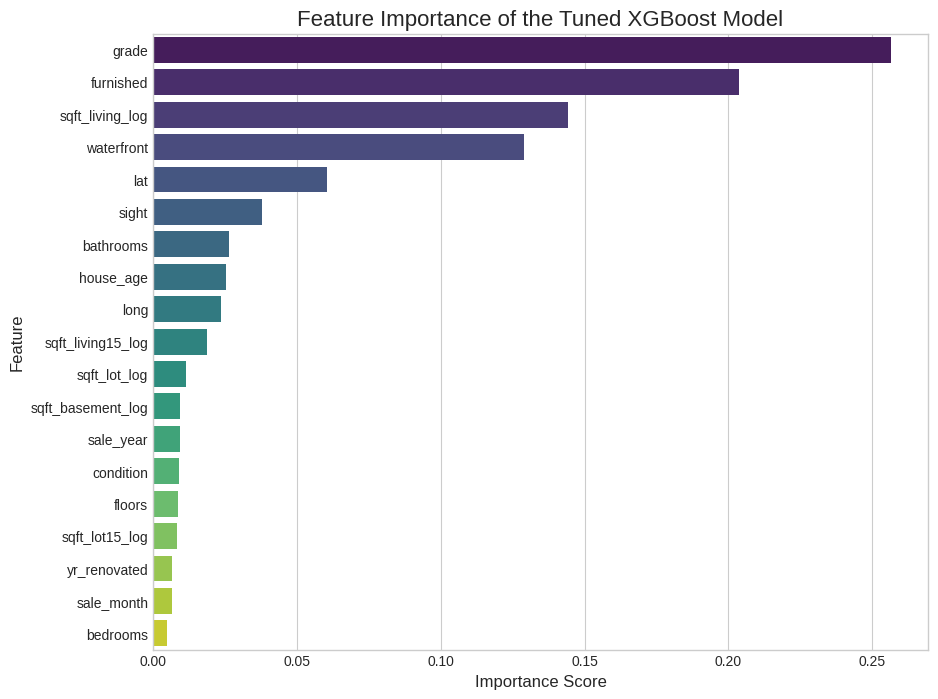


--- Top 10 Most Important Features (Tuned XGBoost) ---
              Feature  Importance
6               grade        0.26
10          furnished        0.20
11    sqft_living_log        0.14
3          waterfront        0.13
8                 lat        0.06
4               sight        0.04
1           bathrooms        0.03
18          house_age        0.03
9                long        0.02
14  sqft_living15_log        0.02


In [88]:
importances_tuned_xgb = best_xgb_model.feature_importances_

# Get the names of the features (using X_train's columns)
feature_names_tuned_xgb = X_train.columns

# Create a DataFrame for easy viewing
feature_importance_df_tuned_xgb = pd.DataFrame({
    'Feature': feature_names_tuned_xgb,
    'Importance': importances_tuned_xgb
})

# Sort the DataFrame by importance in descending order
feature_importance_df_tuned_xgb = feature_importance_df_tuned_xgb.sort_values(by='Importance', ascending=False)

# --- Visualize the Feature Importances ---

# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(10, 8)) # Set the figure size

# Create a horizontal bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_tuned_xgb, palette='viridis')

# Add titles and labels for clarity
plt.title('Feature Importance of the Tuned XGBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.show()

# Display the top 10 most important features as a table
print("\n--- Top 10 Most Important Features (Tuned XGBoost) ---")
print(feature_importance_df_tuned_xgb.head(10))

In [96]:
# Gather performance metrics for comparison
# Using metrics from the latest runs of each model, including tuned models where applicable

performance_metrics_comparison = {
    'Model': [
        'Linear Regression', 'Linear Regression',
        'Decision Tree', 'Decision Tree',
        'Random Forest (Tuned)', 'Random Forest (Tuned)',
        'XGBoost (Tuned)', 'XGBoost (Tuned)'
    ],
    'DataSet': [
        'Training', 'Testing',
        'Training', 'Testing',
        'Training', 'Testing',
        'Training', 'Testing'
    ],
    'R-squared (R²)': [
        r2_train, r2_test,
        r2_train_dt, r2_test_dt,
        grid_search.best_estimator_.score(X_train, y_train), grid_search.best_estimator_.score(X_test, y_test), # Tuned RF R2
        best_xgb_model.score(X_train, y_train), best_xgb_model.score(X_test, y_test) # Tuned XGB R2
    ],
    'Mean Absolute Error (MAE)': [
        mae_train, mae_test,
        mae_train_dt, mae_test_dt,
        metrics.mean_absolute_error(y_train, grid_search.best_estimator_.predict(X_train)), metrics.mean_absolute_error(y_test, grid_search.best_estimator_.predict(X_test)), # Tuned RF MAE
        metrics.mean_absolute_error(y_train, best_xgb_model.predict(X_train)), metrics.mean_absolute_error(y_test, best_xgb_model.predict(X_test)) # Tuned XGB MAE
    ],
    'Root Mean Squared Error (RMSE)': [
        rmse_train, rmse_test,
        rmse_train_dt, rmse_test_dt,
        np.sqrt(metrics.mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))), # Tuned RF RMSE
         np.sqrt(metrics.mean_squared_error(y_train, best_xgb_model.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, best_xgb_model.predict(X_test))) # Tuned XGB RMSE
    ],
    'Mean Absolute Percentage Error (MAPE)': [
        mape_train, mape_test,
        mape_train_dt, mape_test_dt,
        np.mean(np.abs((y_train - grid_search.best_estimator_.predict(X_train)) / (y_train + 1e-8))) * 100, np.mean(np.abs((y_test - grid_search.best_estimator_.predict(X_test)) / (y_test + 1e-8))) * 100, # Tuned RF MAPE
        np.mean(np.abs((y_train - best_xgb_model.predict(X_train)) / (y_train + 1e-8))) * 100, np.mean(np.abs((y_test - best_xgb_model.predict(X_test)) / (y_test + 1e-8))) * 100 # Tuned XGB MAPE
    ]
}

# Convert the dictionary to a DataFrame
performance_comparison_df = pd.DataFrame(performance_metrics_comparison)

# Display the DataFrame
print("Gathered performance metrics for comparison:")
display(performance_comparison_df)

Gathered performance metrics for comparison:


Model   DataSet  R-squared (R²)  Mean Absolute Error (MAE)  \
0      Linear Regression  Training            0.66                  128960.72   
1      Linear Regression   Testing            0.68                  130259.31   
2          Decision Tree  Training            1.00                       0.26   
3          Decision Tree   Testing            0.71                  106688.09   
4  Random Forest (Tuned)  Training            0.98                   28007.65   
5  Random Forest (Tuned)   Testing            0.87                   72032.95   
6        XGBoost (Tuned)  Training            0.96                   48948.91   
7        XGBoost (Tuned)   Testing            0.89                   67263.12   

   Root Mean Squared Error (RMSE)  Mean Absolute Percentage Error (MAPE)  
0                       213165.15                                  26.13  
1                       216353.38                                  26.15  
2                           17.38                                   0.00  
3                       206304.57                                  18.91  
4                        50495.48                                   5.36  
5                       137184.78                                  13.11  
6                        70713.95                                  10.43  
7                       126694.60                                  12.38

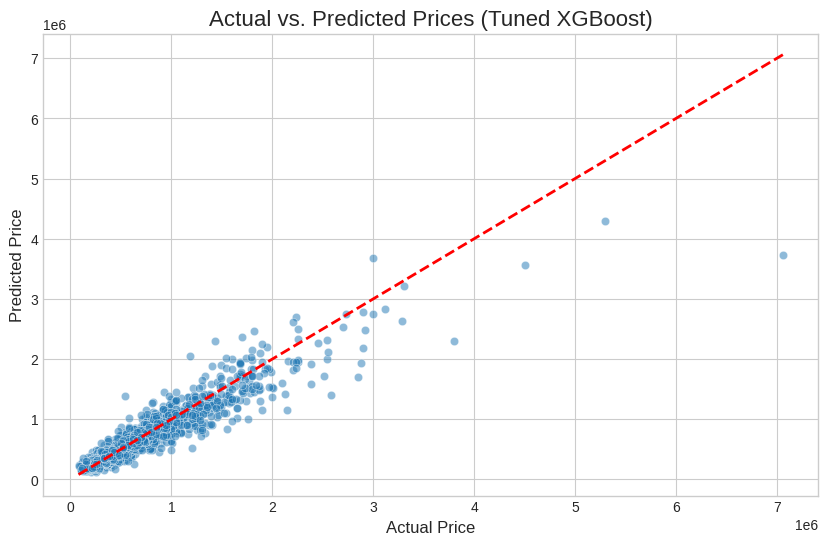

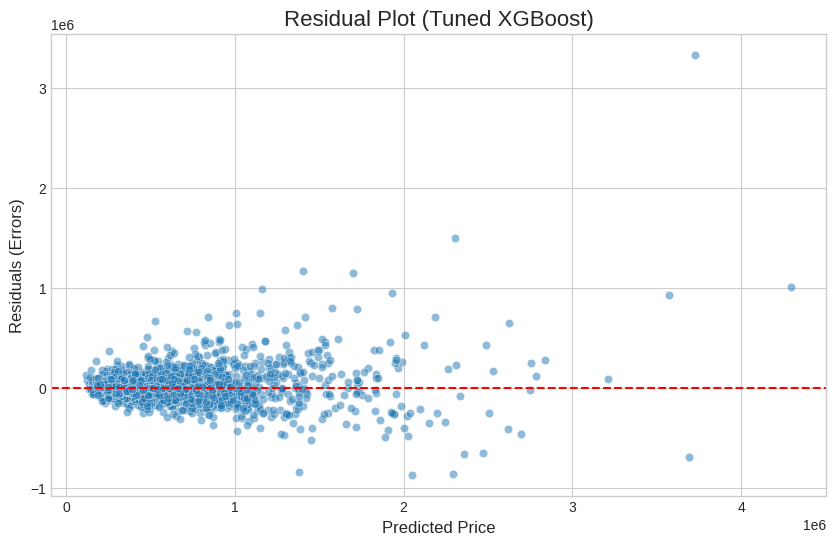

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# ----- Predicted vs. Actual Plot (Tuned XGBoost) -----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned_xgb, alpha=0.5)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs. Predicted Prices (Tuned XGBoost)', fontsize=16)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

# ----- Residual Plot (Tuned XGBoost) -----
residuals_tuned_xgb = y_test - y_pred_tuned_xgb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_tuned_xgb, y=residuals_tuned_xgb, alpha=0.5)
# Add a horizontal line at zero
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Tuned XGBoost)', fontsize=16)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)
plt.show()